In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [53]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region (2)')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

In [54]:
# Susceptible, Exposed, Infected_Symptomatic, Infected_Asymptomatic, Recovered
init_pop = {
    'Central_High': [234144, 1, 1, 1, 0], # assuming the 1st E, I, A begin from Central region
    'Central_Low': [277516, 0, 0, 0, 0],
    'East_High': [249102, 0, 0, 0, 0],
    'East_Low': [239228, 0, 0, 0, 0],
    'North_Central_High': [175301, 0, 0, 0, 0],
    'North_Central_Low': [471079, 0, 0, 0, 0],
    'North_Coastal_High': [159507, 0, 0, 0, 0],
    'North_Coastal_Low': [375712, 0, 0, 0, 0],
    'North_Inland_High': [195235, 0, 0, 0, 0],
    'North_Inland_Low': [406765, 0, 0, 0, 0],
    'South_High': [212538, 0, 0, 0, 0],
    'South_Low': [287538, 0, 0, 0, 0]
}

In [55]:
# Extracting the initial conditions from above

# Central High Risk
S_H_C_0, E_H_C_0, I_H_C_0, A_H_C_0, R_H_C_0 = init_pop['Central_High'][0],\
                                    init_pop['Central_High'][1],\
                                    init_pop['Central_High'][2],\
                                    init_pop['Central_High'][3],\
                                    init_pop['Central_High'][4]

# Central Low Risk
S_L_C_0, E_L_C_0, I_L_C_0, A_L_C_0, R_L_C_0 = init_pop['Central_Low'][0],\
                                    init_pop['Central_Low'][1],\
                                    init_pop['Central_Low'][2],\
                                    init_pop['Central_Low'][3],\
                                    init_pop['Central_Low'][4]

# East High Risk
S_H_E_0, E_H_E_0, I_H_E_0, A_H_E_0, R_H_E_0 = init_pop['East_High'][0],\
                                    init_pop['East_High'][1],\
                                    init_pop['East_High'][2],\
                                    init_pop['East_High'][3],\
                                    init_pop['East_High'][4]

# East Low Risk
S_L_E_0, E_L_E_0, I_L_E_0, A_L_E_0, R_L_E_0 = init_pop['East_Low'][0],\
                                    init_pop['East_Low'][1],\
                                    init_pop['East_Low'][2],\
                                    init_pop['East_Low'][3],\
                                    init_pop['East_Low'][4]

# North Central High Risk
S_H_NCen_0, E_H_NCen_0, I_H_NCen_0, A_H_NCen_0, R_H_NCen_0 = init_pop['North_Central_High'][0],\
                                                   init_pop['North_Central_High'][1],\
                                                   init_pop['North_Central_High'][2],\
                                                   init_pop['North_Central_High'][3],\
                                                   init_pop['North_Central_High'][4]

# North Central Low Risk
S_L_NCen_0, E_L_NCen_0, I_L_NCen_0, A_L_NCen_0, R_L_NCen_0 =  init_pop['North_Central_Low'][0],\
                                                    init_pop['North_Central_Low'][1],\
                                                    init_pop['North_Central_Low'][2],\
                                                    init_pop['North_Central_Low'][3],\
                                                    init_pop['North_Central_Low'][4]

# North Coastal High Risk
S_H_NCoa_0, E_H_NCoa_0, I_H_NCoa_0, A_H_NCoa_0, R_H_NCoa_0 =  init_pop['North_Coastal_High'][0],\
                                                    init_pop['North_Coastal_High'][1],\
                                                    init_pop['North_Coastal_High'][2],\
                                                    init_pop['North_Coastal_High'][3],\
                                                    init_pop['North_Coastal_High'][4]

# North Coastal Low Risk
S_L_NCoa_0, E_L_NCoa_0, I_L_NCoa_0, A_L_NCoa_0, R_L_NCoa_0 =  init_pop['North_Coastal_Low'][0],\
                                                    init_pop['North_Coastal_Low'][1],\
                                                    init_pop['North_Coastal_Low'][2],\
                                                    init_pop['North_Coastal_Low'][3],\
                                                    init_pop['North_Coastal_Low'][4]

# North Inland High Risk
S_H_NI_0, E_H_NI_0, I_H_NI_0, A_H_NI_0, R_H_NI_0 =  init_pop['North_Inland_High'][0],\
                                          init_pop['North_Inland_High'][1],\
                                          init_pop['North_Inland_High'][2],\
                                          init_pop['North_Inland_High'][3],\
                                          init_pop['North_Inland_High'][4]

# North Inland Low Risk
S_L_NI_0, E_L_NI_0, I_L_NI_0, A_L_NI_0, R_L_NI_0 =  init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][2],\
                                          init_pop['North_Inland_Low'][3],\
                                          init_pop['North_Inland_Low'][4]

# South High Risk
S_H_S_0, E_H_S_0, I_H_S_0, A_H_S_0, R_H_S_0 = init_pop['South_High'][0],\
                                    init_pop['South_High'][1],\
                                    init_pop['South_High'][2],\
                                    init_pop['South_High'][3],\
                                    init_pop['South_High'][4]

# South Low Risk
S_L_S_0, E_L_S_0, I_L_S_0, A_L_S_0, R_L_S_0 = init_pop['South_Low'][0],\
                                    init_pop['South_Low'][1],\
                                    init_pop['South_Low'][2],\
                                    init_pop['South_Low'][3],\
                                    init_pop['South_Low'][4]

In [56]:
C_H = np.zeros((215, 5))

C_H

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Function for Discrete Stochastic SEIAR Model

In [57]:
# Assumed parameters -> modified based on the situation
param_dict = {
    'High': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
    'Low': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
}

gamma = param_dict['High'][2] # 1/gamma = incubation period (per day)
theta = param_dict['High'][3] # theta = proportion of showing symptoms (sympomatic rate) (per day)
lamb = param_dict['High'][4] # 1/lambda = infectious period (per day)
delta = param_dict['High'][5] # death rate (per day)

In [58]:
def SEIAR_model(S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init, S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init,\
               S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init, S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init,\
               S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init, S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init,\
               S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init, S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init,\
               S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init, S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init,\
               S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init, S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init, \
               beta_sym, beta_asym, gamma, theta, lamb, delta):
   
    '''
    Use the SEIAR model to predict the number of people in each compartment at each time step.
    The MC simulation estimates the mean of the number of people in each compartment at each time step.
    ------------------------------------------------------------------------------------------
    Input:
        Initial population in each compartment (line 1-6)
        beta_sym: transmission rate of symptomatic individuals -> to be calibrated
        beta_asym: transmission rate of asymptomatic individuals -> to be calibrated
        gamma: rate of recovery
        theta: rate of progression from exposed to infectious
        lamb: rate of progression from infectious to asymptomatic
        delta: rate of progression from asymptomatic to recovered
    
    Output:
        Populations for SEIAR from each region
    '''

    # Simulation length (in days)
    t = 214
    
    # Initialise arrays to store populations
    C_H = np.zeros((t+1, 5))
    C_L = np.zeros((t+1, 5))

    E_H = np.zeros((t+1, 5))
    E_L = np.zeros((t+1, 5))

    NCen_H = np.zeros((t+1, 5))
    NCen_L = np.zeros((t+1, 5))

    NCoa_H = np.zeros((t+1, 5))
    NCoa_L = np.zeros((t+1, 5))

    NI_H = np.zeros((t+1, 5))
    NI_L = np.zeros((t+1, 5))

    S_H = np.zeros((t+1, 5))
    S_L = np.zeros((t+1, 5))

    # Initial Conditions
    C_H[0][0], C_H[0][1], C_H[0][2], C_H[0][3], C_H[0][4] = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    C_L[0][0], C_L[0][1], C_L[0][2], C_L[0][3], C_L[0][4] = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    E_H[0][0], E_H[0][1], E_H[0][2], E_H[0][3], E_H[0][4] = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    E_L[0][0], E_L[0][1], E_L[0][2], E_L[0][3], E_L[0][4] = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    NCen_H[0][0], NCen_H[0][1], NCen_H[0][2], NCen_H[0][3], NCen_H[0][4] = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    NCen_L[0][0], NCen_L[0][1], NCen_L[0][2], NCen_L[0][3], NCen_L[0][4] = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    NCoa_H[0][0], NCoa_H[0][1], NCoa_H[0][2], NCoa_H[0][3], NCoa_H[0][4] = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    NCoa_L[0][0], NCoa_L[0][1], NCoa_L[0][2], NCoa_L[0][3], NCoa_L[0][4] = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    NI_H[0][0], NI_H[0][1], NI_H[0][2], NI_H[0][3], NI_H[0][4] = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    NI_L[0][0], NI_L[0][1], NI_L[0][2], NI_L[0][3], NI_L[0][4] = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H[0][0], S_H[0][1], S_H[0][2], S_H[0][3], S_H[0][4] = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L[0][0], S_L[0][1], S_L[0][2], S_L[0][3], S_L[0][4] = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init

    # Initialise populations
    S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init


    mob_central_dict = {

        'East': [2518.007912, 1179.226414, 2302.018371], \
        'North_Central': [5431.723516, 1940.995073, 4336.156366], \
        'North_Coastal': [410.088803, 224.745859, 654.88667], \
        'North_Inland': [664.540636, 366.97859, 588.297201], \
        'South': [3640.640873, 1626.007515, 2917.389471]

    }

    mob_east_dict = {

        'Central': [3768.837284, 1440.608412, 2866.137454], \
        'North_Central': [5425.003638, 1919.445416, 4670.294659], \
        'North_Coastal': [483.573126, 191.392576, 473.906442], \
        'North_Inland': [1055.682996, 484.299215, 842.685923], \
        'South': [2488.03862, 980.052445, 2087.730478]

    }

    mob_north_central_dict = {

        'Central': [3657.897354, 1054.592602, 3087.41847], \
        'East': [2111.999373, 871.361025, 2093.514868], \
        'North_Coastal': [1656.53273, 460.539775, 1724.08199], \
        'North_Inland': [2767.349274, 983.942653, 2341.094009], \
        'South': [1257.405478, 596.794501, 1182.745383]

    }

    mob_north_coastal_dict = {

        'Central': [780.166594, 156.644603, 1196.23607], \
        'East': [246.915804, 115.929512, 226.261725], \
        'North_Central': [2547.496323, 631.995693, 1936.045114], \
        'North_Inland': [3898.342286, 1414.099677, 3053.434645], \
        'South': [258.826212, 133.157868, 306.770863]

    }

    mob_north_inland_dict = {

        'Central': [1507.037202, 392.630209, 1305.236506], \
        'East': [1000.642647, 390.292827, 879.488701], \
        'North_Central': [6136.233626, 1687.503238, 4745.989662], \
        'North_Coastal': [5256.002028, 1827.728619, 4981.44469], \
        'South': [607.446061, 255.851188, 534.272639]

    }

    mob_south_dict = {

        'Central': [4053.532554, 1545.91116, 2984.388535], \
        'East': [1970.762799, 828.927306, 1716.573243], \
        'North_Central': [3883.18689, 1374.748533, 3361.535465], \
        'North_Coastal': [391.417326, 147.78653, 331.027812], \
        'North_Inland': [622.229053, 262.674827, 511.746844]

    }

    # Mobility changes for 3 phases -> refer to ./Data/Mobility.ipynb
    for day in range(1, t+1):

        if day <= 70:
            
            # Retrieve mobility changes for each region
            mob_central_east = mob_central_dict['East'][0] / 511660
            mob_central_north_central = mob_central_dict['North_Central'][0] / 511660
            mob_central_north_coastal = mob_central_dict['North_Coastal'][0] / 511660
            mob_central_north_inland = mob_central_dict['North_Inland'][0] / 511660
            mob_central_south = mob_central_dict['South'][0] / 511660

            mob_east_central = mob_east_dict['Central'][0] / 488330
            mob_east_north_central = mob_east_dict['North_Central'][0] / 488330
            mob_east_north_coastal = mob_east_dict['North_Coastal'][0] / 488330
            mob_east_north_inland = mob_east_dict['North_Inland'][0] / 488330
            mob_east_south = mob_east_dict['South'][0] / 488330

            mob_north_central_central = mob_north_central_dict['Central'][0] / 646380
            mob_north_central_east = mob_north_central_dict['East'][0] / 646380
            mob_north_central_north_coastal = mob_north_central_dict['North_Coastal'][0] / 646380
            mob_north_central_north_inland = mob_north_central_dict['North_Inland'][0] / 646380
            mob_north_central_south = mob_north_central_dict['South'][0] / 646380

            mob_north_coastal_central = mob_north_coastal_dict['Central'][0] / 535219
            mob_north_coastal_east = mob_north_coastal_dict['East'][0] / 535219
            mob_north_coastal_north_central = mob_north_coastal_dict['North_Central'][0] / 535219
            mob_north_coastal_north_inland = mob_north_coastal_dict['North_Inland'][0] / 535219
            mob_north_coastal_south = mob_north_coastal_dict['South'][0] / 535219

            mob_north_inland_central = mob_north_inland_dict['Central'][0] / 602000
            mob_north_inland_east = mob_north_inland_dict['East'][0] / 602000
            mob_north_inland_north_central = mob_north_inland_dict['North_Central'][0] / 602000
            mob_north_inland_north_coastal = mob_north_inland_dict['North_Coastal'][0] / 602000
            mob_north_inland_south = mob_north_inland_dict['South'][0] / 602000

            mob_south_central = mob_south_dict['Central'][0] / 500076
            mob_south_east = mob_south_dict['East'][0] / 500076
            mob_south_north_central = mob_south_dict['North_Central'][0] / 500076
            mob_south_north_coastal = mob_south_dict['North_Coastal'][0] / 500076
            mob_south_north_inland = mob_south_dict['North_Inland'][0] / 500076
           
        elif day > 70 and day <= 80:

            # Same as above
            mob_central_east = mob_central_dict['East'][1] / 511660
            mob_central_north_central = mob_central_dict['North_Central'][1] / 511660
            mob_central_north_coastal = mob_central_dict['North_Coastal'][1] / 511660
            mob_central_north_inland = mob_central_dict['North_Inland'][1] / 511660
            mob_central_south = mob_central_dict['South'][1] / 511660

            mob_east_central = mob_east_dict['Central'][1] / 488330
            mob_east_north_central = mob_east_dict['North_Central'][1] / 488330
            mob_east_north_coastal = mob_east_dict['North_Coastal'][1] / 488330
            mob_east_north_inland = mob_east_dict['North_Inland'][1] / 488330
            mob_east_south = mob_east_dict['South'][1] / 488330

            mob_north_central_central = mob_north_central_dict['Central'][1] / 646380
            mob_north_central_east = mob_north_central_dict['East'][1] / 646380
            mob_north_central_north_coastal = mob_north_central_dict['North_Coastal'][1] / 646380
            mob_north_central_north_inland = mob_north_central_dict['North_Inland'][1] / 646380
            mob_north_central_south = mob_north_central_dict['South'][1] / 646380

            mob_north_coastal_central = mob_north_coastal_dict['Central'][1] / 535219
            mob_north_coastal_east = mob_north_coastal_dict['East'][1] / 535219
            mob_north_coastal_north_central = mob_north_coastal_dict['North_Central'][1] / 535219
            mob_north_coastal_north_inland = mob_north_coastal_dict['North_Inland'][1] / 535219
            mob_north_coastal_south = mob_north_coastal_dict['South'][1] / 535219

            mob_north_inland_central = mob_north_inland_dict['Central'][1] / 602000
            mob_north_inland_east = mob_north_inland_dict['East'][1] / 602000
            mob_north_inland_north_central = mob_north_inland_dict['North_Central'][1] / 602000
            mob_north_inland_north_coastal = mob_north_inland_dict['North_Coastal'][1] / 602000
            mob_north_inland_south = mob_north_inland_dict['South'][1] / 602000

            mob_south_central = mob_south_dict['Central'][1] / 500076
            mob_south_east = mob_south_dict['East'][1] / 500076
            mob_south_north_central = mob_south_dict['North_Central'][1] / 500076
            mob_south_north_coastal = mob_south_dict['North_Coastal'][1] / 500076
            mob_south_north_inland = mob_south_dict['North_Inland'][1] / 500076

        else:

            # Same as above
            mob_central_east = mob_central_dict['East'][2] / 511660
            mob_central_north_central = mob_central_dict['North_Central'][2] / 511660
            mob_central_north_coastal = mob_central_dict['North_Coastal'][2] / 511660
            mob_central_north_inland = mob_central_dict['North_Inland'][2] / 511660
            mob_central_south = mob_central_dict['South'][2] / 511660

            mob_east_central = mob_east_dict['Central'][2] / 488330
            mob_east_north_central = mob_east_dict['North_Central'][2] / 488330
            mob_east_north_coastal = mob_east_dict['North_Coastal'][2] / 488330
            mob_east_north_inland = mob_east_dict['North_Inland'][2] / 488330
            mob_east_south = mob_east_dict['South'][2] / 488330

            mob_north_central_central = mob_north_central_dict['Central'][2] / 646380
            mob_north_central_east = mob_north_central_dict['East'][2] / 646380
            mob_north_central_north_coastal = mob_north_central_dict['North_Coastal'][2] / 646380
            mob_north_central_north_inland = mob_north_central_dict['North_Inland'][2] / 646380
            mob_north_central_south = mob_north_central_dict['South'][2] / 646380

            mob_north_coastal_central = mob_north_coastal_dict['Central'][2] / 535219
            mob_north_coastal_east = mob_north_coastal_dict['East'][2] / 535219
            mob_north_coastal_north_central = mob_north_coastal_dict['North_Central'][2] / 535219
            mob_north_coastal_north_inland = mob_north_coastal_dict['North_Inland'][2] / 535219
            mob_north_coastal_south = mob_north_coastal_dict['South'][2] / 535219

            mob_north_inland_central = mob_north_inland_dict['Central'][2] / 602000
            mob_north_inland_east = mob_north_inland_dict['East'][2] / 602000
            mob_north_inland_north_central = mob_north_inland_dict['North_Central'][2] / 602000
            mob_north_inland_north_coastal = mob_north_inland_dict['North_Coastal'][2] / 602000
            mob_north_inland_south = mob_north_inland_dict['South'][2] / 602000

            mob_south_central = mob_south_dict['Central'][2] / 500076
            mob_south_east = mob_south_dict['East'][2] / 500076
            mob_south_north_central = mob_south_dict['North_Central'][2] / 500076
            mob_south_north_coastal = mob_south_dict['North_Coastal'][2] / 500076
            mob_south_north_inland = mob_south_dict['North_Inland'][2] / 500076

        
        # Compute Monte Carlo simulation using biniomial distribution
        # n = initial population, p = probability of event from the model
        Central_High = {'S_to_E': np.random.binomial(S_H_C, (beta_sym * (I_H_C + I_L_C)) + (beta_asym * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_H_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_C, delta) }

        Central_Low = { 'S_to_E': np.random.binomial(S_L_C, (beta_sym * (I_H_C + I_L_C)) + (beta_asym * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_L_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_C, delta) }

        East_High = { 'S_to_E': np.random.binomial(S_H_E, (beta_sym * (I_H_E + I_L_E)) + (beta_asym * (A_H_E + A_L_E))),
                      'E_to_I': np.random.binomial(E_H_E, gamma*theta),
                      'E_to_A': np.random.binomial(E_H_E, gamma*(1-theta)),
                      'I_to_R': np.random.binomial(I_H_E, delta + lamb),
                      'A_to_R': np.random.binomial(A_H_E, delta) }

        East_Low = {    'S_to_E': np.random.binomial(S_L_E, (beta_sym * (I_H_E + I_L_E)) + (beta_asym * (A_H_E + A_L_E))),
                        'E_to_I': np.random.binomial(E_L_E, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_E, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_E, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_E, delta) }
        
        North_Central_High = {  'S_to_E': np.random.binomial(S_H_NCen, (beta_sym * (I_H_NCen + I_L_NCen)) + (beta_asym * (A_H_NCen + A_L_NCen))),
                                'E_to_I': np.random.binomial(E_H_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCen, delta) }
        
        North_Central_Low = {   'S_to_E': np.random.binomial(S_L_NCen, (beta_sym * (I_H_NCen + I_L_NCen) + (beta_asym * (A_H_NCen + A_L_NCen)))),
                                'E_to_I': np.random.binomial(E_L_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCen, delta) }

        North_Coastal_High = {  'S_to_E': np.random.binomial(S_H_NCoa, (beta_sym * (I_H_NCoa + I_L_NCoa)) + (beta_asym * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_H_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCoa, delta) }
        
        North_Coastal_Low = {   'S_to_E': np.random.binomial(S_L_NCoa, (beta_sym * (I_H_NCoa + I_L_NCoa)) + (beta_asym * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_L_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCoa, delta) }
        
        North_Inland_High = {   'S_to_E': np.random.binomial(S_H_NI, (beta_sym * (I_H_NI + I_L_NI)) + (beta_asym * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_H_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NI, delta) }

        North_Inland_Low = {    'S_to_E': np.random.binomial(S_L_NI, (beta_sym * (I_H_NI + I_L_NI)) + (beta_asym * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_L_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NI, delta) }
        
        South_High = {  'S_to_E': np.random.binomial(S_H_S, (beta_sym * (I_H_S + I_L_S)) + (beta_asym * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_H_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_S, delta) }

        South_Low = {   'S_to_E': np.random.binomial(S_L_S, (beta_sym * (I_H_S + I_L_S)) + (beta_asym * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_L_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_S, delta) }
                                
        # Update populations for SEAIR
        # np.max is used to ensure that the population does not go negative
        Central_High_S_new = np.max(S_H_C - Central_High['S_to_E'] + \
            (mob_east_central*S_H_E) + (mob_north_central_central*S_H_NCen) + (mob_north_coastal_central*S_H_NCoa) + (mob_north_inland_central*S_H_NI) + (mob_south_central*S_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_H_C), \
            0)
        Central_High_E_new = np.max(E_H_C + Central_High['S_to_E'] - Central_High['E_to_I'] - Central_High['E_to_A'] + \
            (mob_east_central*E_H_E) + (mob_north_central_central*E_H_NCen) + (mob_north_coastal_central*E_H_NCoa) + (mob_north_inland_central*E_H_NI) + (mob_south_central*E_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_H_C), \
            0)
        Central_High_I_new = np.max(I_H_C + Central_High['E_to_I'] - Central_High['I_to_R'] + \
            (mob_east_central*I_H_E) + (mob_north_central_central*I_H_NCen) + (mob_north_coastal_central*I_H_NCoa) + (mob_north_inland_central*I_H_NI) + (mob_south_central*I_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_H_C), \
            0)
        Central_High_A_new = np.max(A_H_C + Central_High['E_to_A'] - Central_High['A_to_R'] + \
            (mob_east_central*A_H_E) + (mob_north_central_central*A_H_NCen) + (mob_north_coastal_central*A_H_NCoa) + (mob_north_inland_central*A_H_NI) + (mob_south_central*A_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_H_C), \
            0)
        Central_High_R_new = np.max(R_H_C + Central_High['I_to_R'] + Central_High['A_to_R'] + \
            (mob_east_central*R_H_E) + (mob_north_central_central*R_H_NCen) + (mob_north_coastal_central*R_H_NCoa) + (mob_north_inland_central*R_H_NI) + (mob_south_central*R_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_H_C), \
            0)

        Central_Low_S_new = np.max(S_L_C - Central_Low['S_to_E'] + \
            (mob_east_central*S_L_E) + (mob_north_central_central*S_L_NCen) + (mob_north_coastal_central*S_L_NCoa) + (mob_north_inland_central*S_L_NI) + (mob_south_central*S_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_L_C), \
            0)
        Central_Low_E_new = np.max(E_L_C + Central_Low['S_to_E'] - Central_Low['E_to_I'] - Central_Low['E_to_A'] + \
            (mob_east_central*E_L_E) + (mob_north_central_central*E_L_NCen) + (mob_north_coastal_central*E_L_NCoa) + (mob_north_inland_central*E_L_NI) + (mob_south_central*E_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_L_C), \
            0)
        Central_Low_I_new = np.max(I_L_C + Central_Low['E_to_I'] - Central_Low['I_to_R'] + \
            (mob_east_central*I_L_E) + (mob_north_central_central*I_L_NCen) + (mob_north_coastal_central*I_L_NCoa) + (mob_north_inland_central*I_L_NI) + (mob_south_central*I_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_L_C), \
            0)
        Central_Low_A_new = np.max(A_L_C + Central_Low['E_to_A'] - Central_Low['A_to_R'] + \
            (mob_east_central*A_L_E) + (mob_north_central_central*A_L_NCen) + (mob_north_coastal_central*A_L_NCoa) + (mob_north_inland_central*A_L_NI) + (mob_south_central*A_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_L_C), \
            0)
        Central_Low_R_new = np.max(R_L_C + Central_Low['I_to_R'] + Central_Low['A_to_R'] + \
            (mob_east_central*R_L_E) + (mob_north_central_central*R_L_NCen) + (mob_north_coastal_central*R_L_NCoa) + (mob_north_inland_central*R_L_NI) + (mob_south_central*R_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_L_C), \
            0)
        
        East_High_S_new = np.max(S_H_E - East_High['S_to_E'] + \
            (mob_central_east*S_H_C) + (mob_north_central_east*S_H_NCen) + (mob_north_coastal_east*S_H_NCoa) + (mob_north_inland_east*S_H_NI) + (mob_south_east*S_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_H_E), \
            0)
        East_High_E_new = np.max(E_H_E + East_High['S_to_E'] - East_High['E_to_I'] - East_High['E_to_A'] + \
            (mob_central_east*E_H_C) + (mob_north_central_east*E_H_NCen) + (mob_north_coastal_east*E_H_NCoa) + (mob_north_inland_east*E_H_NI) + (mob_south_east*E_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_H_E), \
            0)
        East_High_I_new = np.max(I_H_E + East_High['E_to_I'] - East_High['I_to_R'] + \
            (mob_central_east*I_H_C) + (mob_north_central_east*I_H_NCen) + (mob_north_coastal_east*I_H_NCoa) + (mob_north_inland_east*I_H_NI) + (mob_south_east*I_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_H_E), \
            0)
        East_High_A_new = np.max(A_H_E + East_High['E_to_A'] - East_High['A_to_R'] + \
            (mob_central_east*A_H_C) + (mob_north_central_east*A_H_NCen) + (mob_north_coastal_east*A_H_NCoa) + (mob_north_inland_east*A_H_NI) + (mob_south_east*A_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_H_E), \
            0)
        East_High_R_new = np.max(R_H_E + East_High['I_to_R'] + East_High['A_to_R'] + \
            (mob_central_east*R_H_C) + (mob_north_central_east*R_H_NCen) + (mob_north_coastal_east*R_H_NCoa) + (mob_north_inland_east*R_H_NI) + (mob_south_east*R_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_H_E), \
            0)

        East_Low_S_new = np.max(S_L_E - East_Low['S_to_E'] + \
            (mob_central_east*S_L_C) + (mob_north_central_east*S_L_NCen) + (mob_north_coastal_east*S_L_NCoa) + (mob_north_inland_east*S_L_NI) + (mob_south_east*S_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_L_E), \
            0)
        East_Low_E_new = np.max(E_L_E + East_Low['S_to_E'] - East_Low['E_to_I'] - East_Low['E_to_A'] + \
            (mob_central_east*E_L_C) + (mob_north_central_east*E_L_NCen) + (mob_north_coastal_east*E_L_NCoa) + (mob_north_inland_east*E_L_NI) + (mob_south_east*E_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_L_E), \
            0)
        East_Low_I_new = np.max(I_L_E + East_Low['E_to_I'] - East_Low['I_to_R'] + \
            (mob_central_east*I_L_C) + (mob_north_central_east*I_L_NCen) + (mob_north_coastal_east*I_L_NCoa) + (mob_north_inland_east*I_L_NI) + (mob_south_east*I_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_L_E), \
            0)
        East_Low_A_new = np.max(A_L_E + East_Low['E_to_A'] - East_Low['A_to_R'] + \
            (mob_central_east*A_L_C) + (mob_north_central_east*A_L_NCen) + (mob_north_coastal_east*A_L_NCoa) + (mob_north_inland_east*A_L_NI) + (mob_south_east*A_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_L_E), \
            0)
        East_Low_R_new = np.max(R_L_E + East_Low['I_to_R'] + East_Low['A_to_R'] + \
            (mob_central_east*R_L_C) + (mob_north_central_east*R_L_NCen) + (mob_north_coastal_east*R_L_NCoa) + (mob_north_inland_east*R_L_NI) + (mob_south_east*R_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_L_E), \
            0)
        
        North_Central_High_S_new = np.max(S_H_NCen - North_Central_High['S_to_E'] + \
            (mob_central_north_central*S_H_C) + (mob_east_north_central*S_H_E) + (mob_north_coastal_north_central*S_H_NCoa) + (mob_north_inland_north_central*S_H_NI) + (mob_south_north_central*S_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_H_NCen), \
            0)
        North_Central_High_E_new = np.max(E_H_NCen + North_Central_High['S_to_E'] - North_Central_High['E_to_I'] - North_Central_High['E_to_A'] + \
            (mob_central_north_central*E_H_C) + (mob_east_north_central*E_H_E) + (mob_north_coastal_north_central*E_H_NCoa) + (mob_north_inland_north_central*E_H_NI) + (mob_south_north_central*E_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_H_NCen), \
            0)
        North_Central_High_I_new = np.max(I_H_NCen + North_Central_High['E_to_I'] - North_Central_High['I_to_R'] + \
            (mob_central_north_central*I_H_C) + (mob_east_north_central*I_H_E) + (mob_north_coastal_north_central*I_H_NCoa) + (mob_north_inland_north_central*I_H_NI) + (mob_south_north_central*I_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_H_NCen), \
            0)
        North_Central_High_A_new = np.max(A_H_NCen + North_Central_High['E_to_A'] - North_Central_High['A_to_R'] + \
            (mob_central_north_central*A_H_C) + (mob_east_north_central*A_H_E) + (mob_north_coastal_north_central*A_H_NCoa) + (mob_north_inland_north_central*A_H_NI) + (mob_south_north_central*A_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_H_NCen), \
            0)
        North_Central_High_R_new = np.max(R_H_NCen + North_Central_High['I_to_R'] + North_Central_High['A_to_R'] + \
            (mob_central_north_central*R_H_C) + (mob_east_north_central*R_H_E) + (mob_north_coastal_north_central*R_H_NCoa) + (mob_north_inland_north_central*R_H_NI) + (mob_south_north_central*R_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_H_NCen), \
            0)

        North_Central_Low_S_new = np.max(S_L_NCen - North_Central_Low['S_to_E'] + \
            (mob_central_north_central*S_L_C) + (mob_east_north_central*S_L_E) + (mob_north_coastal_north_central*S_L_NCoa) + (mob_north_inland_north_central*S_L_NI) + (mob_south_north_central*S_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_L_NCen), \
            0)
        North_Central_Low_E_new = np.max(E_L_NCen + North_Central_Low['S_to_E'] - North_Central_Low['E_to_I'] - North_Central_Low['E_to_A'] + \
            (mob_central_north_central*E_L_C) + (mob_east_north_central*E_L_E) + (mob_north_coastal_north_central*E_L_NCoa) + (mob_north_inland_north_central*E_L_NI) + (mob_south_north_central*E_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_L_NCen), \
            0)
        North_Central_Low_I_new = np.max(I_L_NCen + North_Central_Low['E_to_I'] - North_Central_Low['I_to_R'] + \
            (mob_central_north_central*I_L_C) + (mob_east_north_central*I_L_E) + (mob_north_coastal_north_central*I_L_NCoa) + (mob_north_inland_north_central*I_L_NI) + (mob_south_north_central*I_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_L_NCen), \
            0)
        North_Central_Low_A_new = np.max(A_L_NCen + North_Central_Low['E_to_A'] - North_Central_Low['A_to_R'] + \
            (mob_central_north_central*A_L_C) + (mob_east_north_central*A_L_E) + (mob_north_coastal_north_central*A_L_NCoa) + (mob_north_inland_north_central*A_L_NI) + (mob_south_north_central*A_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_L_NCen), \
            0)
        North_Central_Low_R_new = np.max(R_L_NCen + North_Central_Low['I_to_R'] + North_Central_Low['A_to_R'] + \
            (mob_central_north_central*R_L_C) + (mob_east_north_central*R_L_E) + (mob_north_coastal_north_central*R_L_NCoa) + (mob_north_inland_north_central*R_L_NI) + (mob_south_north_central*R_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_L_NCen), \
            0)

        North_Coastal_High_S_new = np.max(S_H_NCoa - North_Coastal_High['S_to_E'] + \
            (mob_central_north_coastal*S_H_C) + (mob_east_north_coastal*S_H_E) + (mob_north_central_north_coastal*S_H_NCen) + (mob_north_inland_north_coastal*S_H_NI) + (mob_south_north_coastal*S_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_H_NCoa), \
            0)
        North_Coastal_High_E_new = np.max(E_H_NCoa + North_Coastal_High['S_to_E'] - North_Coastal_High['E_to_I'] - North_Coastal_High['E_to_A'] + \
            (mob_central_north_coastal*E_H_C) + (mob_east_north_coastal*E_H_E) + (mob_north_central_north_coastal*E_H_NCen) + (mob_north_inland_north_coastal*E_H_NI) + (mob_south_north_coastal*E_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_H_NCoa), \
            0)
        North_Coastal_High_I_new = np.max(I_H_NCoa + North_Coastal_High['E_to_I'] - North_Coastal_High['I_to_R'] + \
            (mob_central_north_coastal*I_H_C) + (mob_east_north_coastal*I_H_E) + (mob_north_central_north_coastal*I_H_NCen) + (mob_north_inland_north_coastal*I_H_NI) + (mob_south_north_coastal*I_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_H_NCoa), \
            0)
        North_Coastal_High_A_new = np.max(A_H_NCoa + North_Coastal_High['E_to_A'] - North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*A_H_C) + (mob_east_north_coastal*A_H_E) + (mob_north_central_north_coastal*A_H_NCen) + (mob_north_inland_north_coastal*A_H_NI) + (mob_south_north_coastal*A_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_H_NCoa), \
            0)
        North_Coastal_High_R_new = np.max(R_H_NCoa + North_Coastal_High['I_to_R'] + North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*R_H_C) + (mob_east_north_coastal*R_H_E) + (mob_north_central_north_coastal*R_H_NCen) + (mob_north_inland_north_coastal*R_H_NI) + (mob_south_north_coastal*R_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_H_NCoa), \
            0)

        North_Coastal_Low_S_new = np.max(S_L_NCoa - North_Coastal_Low['S_to_E'] + \
            (mob_central_north_coastal*S_L_C) + (mob_east_north_coastal*S_L_E) + (mob_north_central_north_coastal*S_L_NCen) + (mob_north_inland_north_coastal*S_L_NI) + (mob_south_north_coastal*S_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_L_NCoa), \
            0)
        North_Coastal_Low_E_new = np.max(E_L_NCoa + North_Coastal_Low['S_to_E'] - North_Coastal_Low['E_to_I'] - North_Coastal_Low['E_to_A'] + \
            (mob_central_north_coastal*E_L_C) + (mob_east_north_coastal*E_L_E) + (mob_north_central_north_coastal*E_L_NCen) + (mob_north_inland_north_coastal*E_L_NI) + (mob_south_north_coastal*E_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_L_NCoa), \
            0)
        North_Coastal_Low_I_new = np.max(I_L_NCoa + North_Coastal_Low['E_to_I'] - North_Coastal_Low['I_to_R'] + \
            (mob_central_north_coastal*I_L_C) + (mob_east_north_coastal*I_L_E) + (mob_north_central_north_coastal*I_L_NCen) + (mob_north_inland_north_coastal*I_L_NI) + (mob_south_north_coastal*I_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_L_NCoa), \
            0)
        North_Coastal_Low_A_new = np.max(A_L_NCoa + North_Coastal_Low['E_to_A'] - North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*A_L_C) + (mob_east_north_coastal*A_L_E) + (mob_north_central_north_coastal*A_L_NCen) + (mob_north_inland_north_coastal*A_L_NI) + (mob_south_north_coastal*A_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_L_NCoa), \
            0)
        North_Coastal_Low_R_new = np.max(R_L_NCoa + North_Coastal_Low['I_to_R'] + North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*R_L_C) + (mob_east_north_coastal*R_L_E) + (mob_north_central_north_coastal*R_L_NCen) + (mob_north_inland_north_coastal*R_L_NI) + (mob_south_north_coastal*R_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_L_NCoa), \
            0)

        North_Inland_High_S_new = np.max(S_H_NI - North_Inland_High['S_to_E'] + \
            (mob_central_north_inland*S_H_C) + (mob_east_north_inland*S_H_E) + (mob_north_central_north_inland*S_H_NCen) + (mob_north_coastal_north_inland*S_H_NCoa) + (mob_south_north_inland*S_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_H_NI), \
            0)
        North_Inland_High_E_new = np.max(E_H_NI + North_Inland_High['S_to_E'] - North_Inland_High['E_to_I'] - North_Inland_High['E_to_A'] + \
            (mob_central_north_inland*E_H_C) + (mob_east_north_inland*E_H_E) + (mob_north_central_north_inland*E_H_NCen) + (mob_north_coastal_north_inland*E_H_NCoa) + (mob_south_north_inland*E_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_H_NI), \
            0)
        North_Inland_High_I_new = np.max(I_H_NI + North_Inland_High['E_to_I'] - North_Inland_High['I_to_R'] + \
            (mob_central_north_inland*I_H_C) + (mob_east_north_inland*I_H_E) + (mob_north_central_north_inland*I_H_NCen) + (mob_north_coastal_north_inland*I_H_NCoa) + (mob_south_north_inland*I_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_H_NI), \
            0)
        North_Inland_High_A_new = np.max(A_H_NI + North_Inland_High['E_to_A'] - North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*A_H_C) + (mob_east_north_inland*A_H_E) + (mob_north_central_north_inland*A_H_NCen) + (mob_north_coastal_north_inland*A_H_NCoa) + (mob_south_north_inland*A_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_H_NI), \
            0)
        North_Inland_High_R_new = np.max(R_H_NI + North_Inland_High['I_to_R'] + North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*R_H_C) + (mob_east_north_inland*R_H_E) + (mob_north_central_north_inland*R_H_NCen) + (mob_north_coastal_north_inland*R_H_NCoa) + (mob_south_north_inland*R_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_H_NI), \
            0)

        North_Inland_Low_S_new = np.max(S_L_NI - North_Inland_Low['S_to_E'] + \
            (mob_central_north_inland*S_L_C) + (mob_east_north_inland*S_L_E) + (mob_north_central_north_inland*S_L_NCen) + (mob_north_coastal_north_inland*S_L_NCoa) + (mob_south_north_inland*S_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_L_NI), \
            0)
        North_Inland_Low_E_new = np.max(E_L_NI + North_Inland_Low['S_to_E'] - North_Inland_Low['E_to_I'] - North_Inland_Low['E_to_A'] + \
            (mob_central_north_inland*E_L_C) + (mob_east_north_inland*E_L_E) + (mob_north_central_north_inland*E_L_NCen) + (mob_north_coastal_north_inland*E_L_NCoa) + (mob_south_north_inland*E_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_L_NI), \
            0)
        North_Inland_Low_I_new = np.max(I_L_NI + North_Inland_Low['E_to_I'] - North_Inland_Low['I_to_R'] + \
            (mob_central_north_inland*I_L_C) + (mob_east_north_inland*I_L_E) + (mob_north_central_north_inland*I_L_NCen) + (mob_north_coastal_north_inland*I_L_NCoa) + (mob_south_north_inland*I_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_L_NI), \
            0)
        North_Inland_Low_A_new = np.max(A_L_NI + North_Inland_Low['E_to_A'] - North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*A_L_C) + (mob_east_north_inland*A_L_E) + (mob_north_central_north_inland*A_L_NCen) + (mob_north_coastal_north_inland*A_L_NCoa) + (mob_south_north_inland*A_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_L_NI), \
            0)
        North_Inland_Low_R_new = np.max(R_L_NI + North_Inland_Low['I_to_R'] + North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*R_L_C) + (mob_east_north_inland*R_L_E) + (mob_north_central_north_inland*R_L_NCen) + (mob_north_coastal_north_inland*R_L_NCoa) + (mob_south_north_inland*R_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_L_NI), \
            0)

        South_High_S_new = np.max(S_H_S - South_High['S_to_E'] + \
            (mob_central_south*S_H_C) + (mob_east_south*S_H_E) + (mob_north_central_south*S_H_NCen) + (mob_north_coastal_south*S_H_NCoa) + (mob_north_inland_south*S_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_H_S), \
            0)
        South_High_E_new = np.max(E_H_S + South_High['S_to_E'] - South_High['E_to_I'] - South_High['E_to_A'] + \
            (mob_central_south*E_H_C) + (mob_east_south*E_H_E) + (mob_north_central_south*E_H_NCen) + (mob_north_coastal_south*E_H_NCoa) + (mob_north_inland_south*E_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_H_S), \
            0)
        South_High_I_new = np.max(I_H_S + South_High['E_to_I'] - South_High['I_to_R'] + \
            (mob_central_south*I_H_C) + (mob_east_south*I_H_E) + (mob_north_central_south*I_H_NCen) + (mob_north_coastal_south*I_H_NCoa) + (mob_north_inland_south*I_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_H_S), \
            0)
        South_High_A_new = np.max(A_H_S + South_High['E_to_A'] - South_High['A_to_R'] + \
            (mob_central_south*A_H_C) + (mob_east_south*A_H_E) + (mob_north_central_south*A_H_NCen) + (mob_north_coastal_south*A_H_NCoa) + (mob_north_inland_south*A_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_H_S), \
            0)
        South_High_R_new = np.max(R_H_S + South_High['I_to_R'] + South_High['A_to_R'] + \
            (mob_central_south*R_H_C) + (mob_east_south*R_H_E) + (mob_north_central_south*R_H_NCen) + (mob_north_coastal_south*R_H_NCoa) + (mob_north_inland_south*R_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_H_S), \
            0)

        South_Low_S_new = np.max(S_L_S - South_Low['S_to_E'] + \
            (mob_central_south*S_L_C) + (mob_east_south*S_L_E) + (mob_north_central_south*S_L_NCen) + (mob_north_coastal_south*S_L_NCoa) + (mob_north_inland_south*S_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_L_S), \
            0)
        South_Low_E_new = np.max(E_L_S + South_Low['S_to_E'] - South_Low['E_to_I'] - South_Low['E_to_A'] + \
            (mob_central_south*E_L_C) + (mob_east_south*E_L_E) + (mob_north_central_south*E_L_NCen) + (mob_north_coastal_south*E_L_NCoa) + (mob_north_inland_south*E_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_L_S), \
            0)
        South_Low_I_new = np.max(I_L_S + South_Low['E_to_I'] - South_Low['I_to_R'] + \
            (mob_central_south*I_L_C) + (mob_east_south*I_L_E) + (mob_north_central_south*I_L_NCen) + (mob_north_coastal_south*I_L_NCoa) + (mob_north_inland_south*I_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_L_S), \
            0)
        South_Low_A_new = np.max(A_L_S + South_Low['E_to_A'] - South_Low['A_to_R'] + \
            (mob_central_south*A_L_C) + (mob_east_south*A_L_E) + (mob_north_central_south*A_L_NCen) + (mob_north_coastal_south*A_L_NCoa) + (mob_north_inland_south*A_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_L_S), \
            0)
        South_Low_R_new = np.max(R_L_S + South_Low['I_to_R'] + South_Low['A_to_R'] + \
            (mob_central_south*R_L_C) + (mob_east_south*R_L_E) + (mob_north_central_south*R_L_NCen) + (mob_north_coastal_south*R_L_NCoa) + (mob_north_inland_south*R_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_L_S), \
            0)

        # Store the values for the current loop
        C_H[day][0], C_H[day][1], C_H[day][2], C_H[day][3], C_H[day][4] =  S_H_C, E_H_C, I_H_C, A_H_C, R_H_C
        C_L[day][0], C_L[day][1], C_L[day][2], C_L[day][3], C_L[day][4] =  S_L_C, E_L_C, I_L_C, A_L_C, R_L_C

        E_H[day][0], E_H[day][1], E_H[day][2], E_H[day][3], E_H[day][4] =  S_H_E, E_H_E, I_H_E, A_H_E, R_H_E
        E_L[day][0], E_L[day][1], E_L[day][2], E_L[day][3], E_L[day][4] =  S_L_E, E_L_E, I_L_E, A_L_E, R_L_E

        NCen_H[day][0], NCen_H[day][1], NCen_H[day][2], NCen_H[day][3], NCen_H[day][4] =  S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen
        NCen_L[day][0], NCen_L[day][1], NCen_L[day][2], NCen_L[day][3], NCen_L[day][4] =  S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen

        NCoa_H[day][0], NCoa_H[day][1], NCoa_H[day][2], NCoa_H[day][3], NCoa_H[day][4] =  S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa
        NCoa_L[day][0], NCoa_L[day][1], NCoa_L[day][2], NCoa_L[day][3], NCoa_L[day][4] =  S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa

        NI_H[day][0], NI_H[day][1], NI_H[day][2], NI_H[day][3], NI_H[day][4] =  S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI
        NI_L[day][0], NI_L[day][1], NI_L[day][2], NI_L[day][3], NI_L[day][4] =  S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI
        
        S_H[day][0], S_H[day][1], S_H[day][2], S_H[day][3], S_H[day][4] =  S_H_S, E_H_S, I_H_S, A_H_S, R_H_S
        S_L[day][0], S_L[day][1], S_L[day][2], S_L[day][3], S_L[day][4] =  S_L_S, E_L_S, I_L_S, A_L_S, R_L_S

        # Update values for next compuation
        # Here used ceil method to avoid decimal values
        S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = np.ceil(Central_High_S_new), np.ceil(Central_High_E_new), np.ceil(Central_High_I_new), np.ceil(Central_High_A_new), np.ceil(Central_High_R_new)
        S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = np.ceil(Central_Low_S_new), np.ceil(Central_Low_E_new), np.ceil(Central_Low_I_new), np.ceil(Central_Low_A_new), np.ceil(Central_Low_R_new)

        S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = np.ceil(East_High_S_new), np.ceil(East_High_E_new), np.ceil(East_High_I_new), np.ceil(East_High_A_new), np.ceil(East_High_R_new)
        S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = np.ceil(East_Low_S_new), np.ceil(East_Low_E_new), np.ceil(East_Low_I_new), np.ceil(East_Low_A_new), np.ceil(East_Low_R_new)

        S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = np.ceil(North_Central_High_S_new), np.ceil(North_Central_High_E_new), np.ceil(North_Central_High_I_new), np.ceil(North_Central_High_A_new), np.ceil(North_Central_High_R_new)
        S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = np.ceil(North_Central_Low_S_new), np.ceil(North_Central_Low_E_new), np.ceil(North_Central_Low_I_new), np.ceil(North_Central_Low_A_new), np.ceil(North_Central_Low_R_new)

        S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = np.ceil(North_Coastal_High_S_new), np.ceil(North_Coastal_High_E_new), np.ceil(North_Coastal_High_I_new), np.ceil(North_Coastal_High_A_new), np.ceil(North_Coastal_High_R_new)
        S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = np.ceil(North_Coastal_Low_S_new), np.ceil(North_Coastal_Low_E_new), np.ceil(North_Coastal_Low_I_new), np.ceil(North_Coastal_Low_A_new), np.ceil(North_Coastal_Low_R_new)

        S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = np.ceil(North_Inland_High_S_new), np.ceil(North_Inland_High_E_new), np.ceil(North_Inland_High_I_new), np.ceil(North_Inland_High_A_new), np.ceil(North_Inland_High_R_new)
        S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = np.ceil(North_Inland_Low_S_new), np.ceil(North_Inland_Low_E_new), np.ceil(North_Inland_Low_I_new), np.ceil(North_Inland_Low_A_new), np.ceil(North_Inland_Low_R_new)

        S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = np.ceil(South_High_S_new), np.ceil(South_High_E_new), np.ceil(South_High_I_new), np.ceil(South_High_A_new), np.ceil(South_High_R_new)
        S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = np.ceil(South_Low_S_new), np.ceil(South_Low_E_new), np.ceil(South_Low_I_new), np.ceil(South_Low_A_new), np.ceil(South_Low_R_new)


    # return dictionaries of all the values in each compartment
    return C_H, C_L, E_H, E_L, NCen_H, NCen_L, NCoa_H, NCoa_L, NI_H, NI_L, S_H, S_L


### Function to simulate the Monte Carlo simulation

In [59]:
# Initialize DFs to store values
result_Central_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_Central_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_High_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_Low_v1 = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }

In [60]:
def MC_SEIAR(low_b, up_b):


    '''
    Simply run the SEIAR model for a range of beta values and store the results in a dictionary generated above.
    ----------------------------------------------------------------------------------------------------------------
    Input:
        low_b: lower bound of beta values
        up_b: upper bound of beta values

    Output:
        None -> results stored in the dictionary generated above
    '''
    
    # Initialise the counter for successful runs and failed runs
    count_1 = 0
    count_2 = 0
    total_count = 0

    # Run the model for a range of beta values
    for beta_symp in np.arange(low_b, up_b, 0.1e-07):
        for beta_asymp in np.arange(low_b, up_b, 0.1e-07):

            total_count += 1

            # Set the condition here if it is a successful run
            try:

                Central_High_result, Central_Low_result, East_High_result, East_Low_result, NCen_High_result, NCen_Low_result, \
                NCoa_High_result, NCoa_Low_result, NI_High_result, NI_Low_result, South_High_result, South_Low_result = \
                SEIAR_model(S_H_C_0, E_H_C_0, I_H_C_0, A_H_C_0, R_H_C_0, S_L_C_0, E_L_C_0, I_L_C_0, A_L_C_0, R_L_C_0,\
                            S_H_E_0, E_H_E_0, I_H_E_0, A_H_E_0, R_H_E_0, S_L_E_0, E_L_E_0, I_L_E_0, A_L_E_0, R_L_E_0,\
                            S_H_NCen_0, E_H_NCen_0, I_H_NCen_0, A_H_NCen_0, R_H_NCen_0, S_L_NCen_0, E_L_NCen_0, I_L_NCen_0, A_L_NCen_0, R_L_NCen_0,\
                            S_H_NCoa_0, E_H_NCoa_0, I_H_NCoa_0, A_H_NCoa_0, R_H_NCoa_0, S_L_NCoa_0, E_L_NCoa_0, I_L_NCoa_0, A_L_NCoa_0, R_L_NCoa_0,\
                            S_H_NI_0, E_H_NI_0, I_H_NI_0, A_H_NI_0, R_H_NI_0, S_L_NI_0, E_L_NI_0, I_L_NI_0, A_L_NI_0, R_L_NI_0,\
                            S_H_S_0, E_H_S_0, I_H_S_0, A_H_S_0, R_H_S_0, S_L_S_0, E_L_S_0, I_L_S_0, A_L_S_0, R_L_S_0, \
                            beta_symp, beta_asymp, gamma, theta, lamb, delta) 
                            # mob_central, mob_east, mob_north_central, mob_north_coastal, mob_north_inland, mob_south, all from xx to xx

                # Store the results in the dictionary
                result_Central_High_v1['Beta Symptomatic'].append(beta_symp)
                result_Central_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_Central_High_v1['S'].append(Central_High_result[:,0])
                result_Central_High_v1['E'].append(Central_High_result[:,1])
                result_Central_High_v1['I'].append(Central_High_result[:,2])
                result_Central_High_v1['A'].append(Central_High_result[:,3])
                result_Central_High_v1['R'].append(Central_High_result[:,4])

                result_Central_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_Central_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_Central_Low_v1['S'].append(Central_Low_result[:,0])
                result_Central_Low_v1['E'].append(Central_Low_result[:,1])
                result_Central_Low_v1['I'].append(Central_Low_result[:,2])
                result_Central_Low_v1['A'].append(Central_Low_result[:,3])
                result_Central_Low_v1['R'].append(Central_Low_result[:,4])

                result_East_High_v1['Beta Symptomatic'].append(beta_symp)
                result_East_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_East_High_v1['S'].append(East_High_result[:,0])
                result_East_High_v1['E'].append(East_High_result[:,1])
                result_East_High_v1['I'].append(East_High_result[:,2])
                result_East_High_v1['A'].append(East_High_result[:,3])
                result_East_High_v1['R'].append(East_High_result[:,4])

                result_East_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_East_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_East_Low_v1['S'].append(East_Low_result[:,0])
                result_East_Low_v1['E'].append(East_Low_result[:,1])
                result_East_Low_v1['I'].append(East_Low_result[:,2])
                result_East_Low_v1['A'].append(East_Low_result[:,3])
                result_East_Low_v1['R'].append(East_Low_result[:,4])

                result_North_Central_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Central_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Central_High_v1['S'].append(NCen_High_result[:,0])
                result_North_Central_High_v1['E'].append(NCen_High_result[:,1])
                result_North_Central_High_v1['I'].append(NCen_High_result[:,2])
                result_North_Central_High_v1['A'].append(NCen_High_result[:,3])
                result_North_Central_High_v1['R'].append(NCen_High_result[:,4])

                result_North_Central_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Central_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Central_Low_v1['S'].append(NCen_Low_result[:,0])
                result_North_Central_Low_v1['E'].append(NCen_Low_result[:,1])
                result_North_Central_Low_v1['I'].append(NCen_Low_result[:,2])
                result_North_Central_Low_v1['A'].append(NCen_Low_result[:,3])
                result_North_Central_Low_v1['R'].append(NCen_Low_result[:,4])

                result_North_Coastal_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Coastal_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Coastal_High_v1['S'].append(NCoa_High_result[:,0])
                result_North_Coastal_High_v1['E'].append(NCoa_High_result[:,1])
                result_North_Coastal_High_v1['I'].append(NCoa_High_result[:,2])
                result_North_Coastal_High_v1['A'].append(NCoa_High_result[:,3])
                result_North_Coastal_High_v1['R'].append(NCoa_High_result[:,4])

                result_North_Coastal_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Coastal_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Coastal_Low_v1['S'].append(NCoa_Low_result[:,0])
                result_North_Coastal_Low_v1['E'].append(NCoa_Low_result[:,1])
                result_North_Coastal_Low_v1['I'].append(NCoa_Low_result[:,2])
                result_North_Coastal_Low_v1['A'].append(NCoa_Low_result[:,3])
                result_North_Coastal_Low_v1['R'].append(NCoa_Low_result[:,4])

                result_North_Inland_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Inland_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Inland_High_v1['S'].append(NI_High_result[:,0])
                result_North_Inland_High_v1['E'].append(NI_High_result[:,1])
                result_North_Inland_High_v1['I'].append(NI_High_result[:,2])
                result_North_Inland_High_v1['A'].append(NI_High_result[:,3])
                result_North_Inland_High_v1['R'].append(NI_High_result[:,4])

                result_North_Inland_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Inland_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Inland_Low_v1['S'].append(NI_Low_result[:,0])
                result_North_Inland_Low_v1['E'].append(NI_Low_result[:,1])
                result_North_Inland_Low_v1['I'].append(NI_Low_result[:,2])
                result_North_Inland_Low_v1['A'].append(NI_Low_result[:,3])
                result_North_Inland_Low_v1['R'].append(NI_Low_result[:,4])

                result_South_High_v1['Beta Symptomatic'].append(beta_symp)
                result_South_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_South_High_v1['S'].append(South_High_result[:,0])
                result_South_High_v1['E'].append(South_High_result[:,1])
                result_South_High_v1['I'].append(South_High_result[:,2])
                result_South_High_v1['A'].append(South_High_result[:,3])
                result_South_High_v1['R'].append(South_High_result[:,4])

                result_South_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_South_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_South_Low_v1['S'].append(South_Low_result[:,0])
                result_South_Low_v1['E'].append(South_Low_result[:,1])
                result_South_Low_v1['I'].append(South_Low_result[:,2])
                result_South_Low_v1['A'].append(South_Low_result[:,3])
                result_South_Low_v1['R'].append(South_Low_result[:,4])

                # If the simulation is successful, the number of success increases by 1
                count_1 += 1

            # Othereise, if the simulation failed, nothing happens      
            except:

                # If the simulation is failed, the number of failure increases by 1
                count_2 += 1
                

    print('Success', count_1, 'times')
    print('Failed', count_2, 'times')
    print('Total Count', total_count, 'times')


### Compute MC_SEIAR

In [61]:
MC_SEIAR(1.0e-10, 1.0e-08)

Success 1 times
Failed 0 times
Total Count 1 times


In [62]:
MC_SEIAR(1.0e-08, 1.0e-07)

Success 60 times
Failed 21 times
Total Count 81 times


In [63]:
MC_SEIAR(1.0e-07, 1.0e-06)

Success 6809 times
Failed 1291 times
Total Count 8100 times


In [64]:
MC_SEIAR(1.0e-06, 0.5e-05)

Success 7121 times
Failed 153680 times
Total Count 160801 times


In [65]:
# MC_SEIAR(0.5e-05, 0.8e-05)

In [66]:
# MC_SEIAR(0.8e-05, 0.9e-05)

In [67]:
# MC_SEIAR(0.9e-05, 0.95e-05)

In [68]:
# MC_SEIAR(0.95e-05, 1.0e-04)

### Compute the LSQS

In [69]:
# Convert dictionary to PD dataframe
central_high_v1 = pd.DataFrame(result_Central_High_v1)
east_high_v1 = pd.DataFrame(result_East_High_v1)
north_central_high_v1 = pd.DataFrame(result_North_Central_High_v1)
north_coastal_high_v1 = pd.DataFrame(result_North_Coastal_High_v1)
north_inland_high_v1 = pd.DataFrame(result_North_Inland_High_v1)
south_high_v1 = pd.DataFrame(result_South_High_v1)

In [70]:
# Add computed cases to the dataframe
central_high_v1['Cases'] = central_high_v1['I']
east_high_v1['Cases'] = east_high_v1['I']
north_central_high_v1['Cases'] = north_central_high_v1['I']
north_coastal_high_v1['Cases'] = north_coastal_high_v1['I']
north_inland_high_v1['Cases'] = north_inland_high_v1['I']
south_high_v1['Cases'] = south_high_v1['I']

In [71]:
central_low_v1 = pd.DataFrame(result_Central_Low_v1)
east_low_v1 = pd.DataFrame(result_East_Low_v1)
north_central_low_v1 = pd.DataFrame(result_North_Central_Low_v1)
north_coastal_low_v1 = pd.DataFrame(result_North_Coastal_Low_v1)
north_inland_low_v1 = pd.DataFrame(result_North_Inland_Low_v1)
south_low_v1 = pd.DataFrame(result_South_Low_v1)

In [373]:
central_high_v1

,Beta Symptomatic,Beta Asymptomatic,S,E,I,A,R,Cases,Difference Squared
0,1.000000e-10,1.000000e-10,"[234144.0, 234144.0, 233707.0, 233277.0, 23285...","[1.0, 1.0, -0.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0,...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, ...","[1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, ...",NaN
1,1.000000e-08,2.000000e-08,"[234144.0, 234144.0, 233707.0, 233277.0, 23285...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 5.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, ...",729.0
2,1.000000e-08,4.000000e-08,"[234144.0, 234144.0, 233707.0, 233277.0, 23285...","[1.0, 1.0, -0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0,...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, ...","[1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 4.0, 4.0, ...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, ...",625.0
3,1.000000e-08,5.000000e-08,"[234144.0, 234144.0, 233707.0, 233277.0, 23285...","[1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, ...",225.0
4,1.000000e-08,6.000000e-08,"[234144.0, 234144.0, 233707.0, 233277.0, 23285...","[1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, ...","[1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 4.0, 5.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, ...","[1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, ...",441.0
...,...,...,...,...,...,...,...,...,...
13986,3.210000e-06,1.000000e-06,"[234144.0, 234144.0, 233707.0, 233275.0, 23284...","[1.0, 1.0, 1.0, 4.0, 7.0, 8.0, 12.0, 18.0, 22....","[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 5.0, 4.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 5.0, 5.0, 5.0, 8.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 4.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 5.0, 4.0, ...",NaN
13987,3.210000e-06,1.020000e-06,"[234144.0, 234144.0, 233706.0, 233276.0, 23284...","[1.0, 1.0, 2.0, 2.0, 5.0, 6.0, 13.0, 16.0, 22....","[1.0, 1.0, -0.0, 1.0, 2.0, 3.0, 2.0, 3.0, 6.0,...","[1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0,...","[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 4.0, ...","[1.0, 1.0, -0.0, 1.0, 2.0, 3.0, 2.0, 3.0, 6.0,...",NaN
13988,3.220000e-06,1.000000e-06,"[234144.0, 234144.0, 233706.0, 233275.0, 23284...","[1.0, 1.0, 2.0, 3.0, 4.0, 3.0, 9.0, 13.0, 15.0...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 5.0, 6.0, ...","[1.0, 1.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 10.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, ...","[1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 5.0, 6.0, ...",NaN
13989,3.230000e-06,1.000000e-06,"[234144.0, 234144.0, 233706.0, 233276.0, 23285...","[1.0, 1.0, 2.0, 2.0, 5.0, 6.0, 8.0, 18.0, 26.0...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 5.0, 5.0, 7.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, ...","[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, ...",NaN


In [380]:
# Here to compute the sum of the squared difference between the simulated cases and the observed cases for each region
for index, row in central_high_v1.iterrows():
    central_high_v1['Difference Squared'] = (row['I'] - central['Diff'][:215])**2

for index, row in east_high_v1.iterrows():
    east_high_v1['Difference Squared'] = (row['I'] - east['Diff'][:215])**2

for index, row in north_central_high_v1.iterrows():
    north_central_high_v1['Difference Squared'] = (row['I'] - north_central['Diff'][:215])**2

for index, row in north_coastal_high_v1.iterrows():
    north_coastal_high_v1['Difference Squared'] = (row['I'] - north_coastal['Diff'][:215])**2

for index, row in north_inland_high_v1.iterrows():
    north_inland_high_v1['Difference Squared'] = (row['I'] - north_inland['Diff'][:215])**2

for index, row in south_high_v1.iterrows():
    south_high_v1['Difference Squared'] = (row['I'] - south['Diff'][:215])**2

In [381]:
# Retrieve the row with the minimum sum of the squared difference
central_lsqs_min = central_high_v1.loc[central_high_v1['Difference Squared'] == central_high_v1['Difference Squared'].min()]
east_lsqs_min = east_high_v1.loc[east_high_v1['Difference Squared'] == east_high_v1['Difference Squared'].min()]
north_central_lsqs_min = north_central_high_v1.loc[north_central_high_v1['Difference Squared'] == north_central_high_v1['Difference Squared'].min()]
north_coastal_lsqs_min = north_coastal_high_v1.loc[north_coastal_high_v1['Difference Squared'] == north_coastal_high_v1['Difference Squared'].min()]
north_inland_lsqs_min = north_inland_high_v1.loc[north_inland_high_v1['Difference Squared'] == north_inland_high_v1['Difference Squared'].min()]
south_lsqs_min = south_high_v1.loc[south_high_v1['Difference Squared'] == south_high_v1['Difference Squared'].min()]

### Extract the parameters

In [382]:
beta_s_Central, beta_as_Central = central_high_v1['Beta Symptomatic'][central_lsqs_min.index[0]], central_high_v1['Beta Asymptomatic'][central_lsqs_min.index[0]]
beta_s_East, beta_as_East = east_high_v1['Beta Symptomatic'][east_lsqs_min.index[0]], east_high_v1['Beta Asymptomatic'][east_lsqs_min.index[0]]
beta_s_North_Central, beta_as_North_Central = north_central_high_v1['Beta Symptomatic'][north_central_lsqs_min.index[0]], north_central_high_v1['Beta Asymptomatic'][north_central_lsqs_min.index[0]]
beta_s_North_Coastal, beta_as_North_Coastal = north_coastal_high_v1['Beta Symptomatic'][north_coastal_lsqs_min.index[0]], north_coastal_high_v1['Beta Asymptomatic'][north_coastal_lsqs_min.index[0]]
beta_s_North_Inland, beta_as_North_Inland = north_inland_high_v1['Beta Symptomatic'][north_inland_lsqs_min.index[0]], north_inland_high_v1['Beta Asymptomatic'][north_inland_lsqs_min.index[0]]
beta_s_South, beta_as_South = south_high_v1['Beta Symptomatic'][south_lsqs_min.index[0]], south_high_v1['Beta Asymptomatic'][south_lsqs_min.index[0]]

In [383]:
print_list = [
    ('Central', "{:.1e}".format(beta_s_Central), "{:.1e}".format(beta_as_Central)),
    ('East', "{:.1e}".format(beta_s_East), "{:.1e}".format(beta_as_East)),
    ('North Central', "{:.1e}".format(beta_s_North_Central), "{:.1e}".format(beta_as_North_Central)),
    ('North Coastal', "{:.1e}".format(beta_s_North_Coastal), "{:.1e}".format(beta_as_North_Coastal)),
    ('North Inland', "{:.1e}".format(beta_s_North_Inland), "{:.1e}".format(beta_as_North_Inland)),
    ('South', "{:.1e}".format(beta_s_South), "{:.1e}".format(beta_as_South))
]

parameters = pd.DataFrame(print_list, columns=['Region', 'Beta Symptomatic', 'Beta Asymptomatic'])

parameters

,Region,Beta Symptomatic,Beta Asymptomatic
0,Central,1.0e-08,8.0e-08
1,East,2.0e-08,6.0e-08
2,North Central,2.0e-08,2.0e-08
3,North Coastal,1.0e-08,6.0e-08
4,North Inland,2.0e-08,3.0e-08
5,South,3.0e-08,2.0e-08


In [532]:
parameters.to_csv('best fit parameters.csv', index = False)

### Plot Everything

In [76]:
# Initialize the time series for simulated length
time = pd.DataFrame(np.linspace(0, 215, 216))

In [308]:
def plot_high_result(
        name1, name2, name3, name4, name5, name6, \
        idx1, idx2, idx3, idx4, idx5, idx6, \
        result1, result2, result3, result4, result5, result6, \
        lsqrs_min1, lsqrs_min2, lsqrs_min3, lsqrs_min4, lsqrs_min5, lsqrs_min6
        ):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1_central = parameters.loc[parameters['Region'] == name1]['Beta Symptomatic'][idx1]
    p2_central = parameters.loc[parameters['Region'] == name1]['Beta Asymptomatic'][idx1]

    p1_east = parameters.loc[parameters['Region'] == name2]['Beta Symptomatic'][idx2]
    p2_east = parameters.loc[parameters['Region'] == name2]['Beta Asymptomatic'][idx2]

    p1_north_central = parameters.loc[parameters['Region'] == name3]['Beta Symptomatic'][idx3]
    p2_north_central = parameters.loc[parameters['Region'] == name3]['Beta Asymptomatic'][idx3]

    p1_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Symptomatic'][idx4]
    p2_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Asymptomatic'][idx4]

    p1_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Symptomatic'][idx5]
    p2_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Asymptomatic'][idx5]

    p1_south = parameters.loc[parameters['Region'] == name6]['Beta Symptomatic'][idx6]
    p2_south = parameters.loc[parameters['Region'] == name6]['Beta Asymptomatic'][idx6]

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][lsqrs_min1.index[0]], label='Central\nβsymp={}\nβasymp={}\n'.format(p1_central, p2_central))
    plt.plot(time, result2['I'][lsqrs_min2.index[0]], label='-------------------------\nEast\nβsymp={}\nβasymp={}\n'.format(p1_east, p2_east))
    plt.plot(time, result3['I'][lsqrs_min3.index[0]], label='-------------------------\nNorth Central\nβsymp={}\nβasymp={}'.format(p1_north_central, p2_north_central))
    plt.plot(time, result4['I'][lsqrs_min4.index[0]], label='-------------------------\nNorth Coastal\nβsymp={}\nβasymp={}'.format(p1_north_coastal, p2_north_coastal))
    plt.plot(time, result5['I'][lsqrs_min5.index[0]], label='-------------------------\nNorth Inland\nβsymp={}\nβasymp={}'.format(p1_north_inland, p2_north_inland))
    plt.plot(time, result6['I'][lsqrs_min6.index[0]], label='-------------------------\nSouth\nβsymp={}\nβasymp={}\n'.format(p1_south, p2_south))
    plt.title('High Risk Group')
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

In [310]:
def plot_low_result(
        name1, name2, name3, name4, name5, name6, \
        idx1, idx2, idx3, idx4, idx5, idx6, \
        result1, result2, result3, result4, result5, result6, \
        lsqrs_min1, lsqrs_min2, lsqrs_min3, lsqrs_min4, lsqrs_min5, lsqrs_min6
        ):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1_central = parameters.loc[parameters['Region'] == name1]['Beta Symptomatic'][idx1]
    p2_central = parameters.loc[parameters['Region'] == name1]['Beta Asymptomatic'][idx1]

    p1_east = parameters.loc[parameters['Region'] == name2]['Beta Symptomatic'][idx2]
    p2_east = parameters.loc[parameters['Region'] == name2]['Beta Asymptomatic'][idx2]

    p1_north_central = parameters.loc[parameters['Region'] == name3]['Beta Symptomatic'][idx3]
    p2_north_central = parameters.loc[parameters['Region'] == name3]['Beta Asymptomatic'][idx3]

    p1_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Symptomatic'][idx4]
    p2_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Asymptomatic'][idx4]

    p1_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Symptomatic'][idx5]
    p2_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Asymptomatic'][idx5]

    p1_south = parameters.loc[parameters['Region'] == name6]['Beta Symptomatic'][idx6]
    p2_south = parameters.loc[parameters['Region'] == name6]['Beta Asymptomatic'][idx6]

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][lsqrs_min1.index[0]], label='Central\nβsymp={}\nβasymp={}\n'.format(p1_central, p2_central))
    plt.plot(time, result2['I'][lsqrs_min2.index[0]], label='-------------------------\nEast\nβsymp={}\nβasymp={}\n'.format(p1_east, p2_east))
    plt.plot(time, result3['I'][lsqrs_min3.index[0]], label='-------------------------\nNorth Central\nβsymp={}\nβasymp={}'.format(p1_north_central, p2_north_central))
    plt.plot(time, result4['I'][lsqrs_min4.index[0]], label='-------------------------\nNorth Coastal\nβsymp={}\nβasymp={}'.format(p1_north_coastal, p2_north_coastal))
    plt.plot(time, result5['I'][lsqrs_min5.index[0]], label='-------------------------\nNorth Inland\nβsymp={}\nβasymp={}'.format(p1_north_inland, p2_north_inland))
    plt.plot(time, result6['I'][lsqrs_min6.index[0]], label='-------------------------\nSouth\nβsymp={}\nβasymp={}\n'.format(p1_south, p2_south))
    plt.title('Low Risk Group')
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

In [313]:
def plot_total_result(
        name1, name2, name3, name4, name5, name6, \
        idx1, idx2, idx3, idx4, idx5, idx6, \
        result1, result2, result3, result4, result5, result6, \
        result7, result8, result9, result10, result11, result12, \
        lsqrs_min1, lsqrs_min2, lsqrs_min3, lsqrs_min4, lsqrs_min5, lsqrs_min6
        ):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1_central = parameters.loc[parameters['Region'] == name1]['Beta Symptomatic'][idx1]
    p2_central = parameters.loc[parameters['Region'] == name1]['Beta Asymptomatic'][idx1]

    p1_east = parameters.loc[parameters['Region'] == name2]['Beta Symptomatic'][idx2]
    p2_east = parameters.loc[parameters['Region'] == name2]['Beta Asymptomatic'][idx2]

    p1_north_central = parameters.loc[parameters['Region'] == name3]['Beta Symptomatic'][idx3]
    p2_north_central = parameters.loc[parameters['Region'] == name3]['Beta Asymptomatic'][idx3]

    p1_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Symptomatic'][idx4]
    p2_north_coastal = parameters.loc[parameters['Region'] == name4]['Beta Asymptomatic'][idx4]

    p1_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Symptomatic'][idx5]
    p2_north_inland = parameters.loc[parameters['Region'] == name5]['Beta Asymptomatic'][idx5]

    p1_south = parameters.loc[parameters['Region'] == name6]['Beta Symptomatic'][idx6]
    p2_south = parameters.loc[parameters['Region'] == name6]['Beta Asymptomatic'][idx6]

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][lsqrs_min1.index[0]] + result7['I'][lsqrs_min1.index[0]], label='Central\nβsymp={}\nβasymp={}\n'.format(p1_central, p2_central))
    plt.plot(time, result2['I'][lsqrs_min2.index[0]] + result8['I'][lsqrs_min2.index[0]], label='-------------------------\nEast\nβsymp={}\nβasymp={}\n'.format(p1_east, p2_east))
    plt.plot(time, result3['I'][lsqrs_min3.index[0]] + result9['I'][lsqrs_min3.index[0]], label='-------------------------\nNorth Central\nβsymp={}\nβasymp={}'.format(p1_north_central, p2_north_central))
    plt.plot(time, result4['I'][lsqrs_min4.index[0]] + result10['I'][lsqrs_min4.index[0]], label='-------------------------\nNorth Coastal\nβsymp={}\nβasymp={}'.format(p1_north_coastal, p2_north_coastal))
    plt.plot(time, result5['I'][lsqrs_min5.index[0]] + result11['I'][lsqrs_min5.index[0]], label='-------------------------\nNorth Inland\nβsymp={}\nβasymp={}'.format(p1_north_inland, p2_north_inland))
    plt.plot(time, result6['I'][lsqrs_min6.index[0]] + result12['I'][lsqrs_min5.index[0]], label='-------------------------\nSouth\nβsymp={}\nβasymp={}\n'.format(p1_south, p2_south))
    plt.title('Total Cases')
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

In [314]:
def plot_diff_result(name, result1, result2, lsqrs_min):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][lsqrs_min.index[0]], label='High Risk')
    plt.plot(time, result2['I'][lsqrs_min.index[0]], label='Low Risk')
    plt.title('{} Region'.format(name))
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

### High Risk Scenario

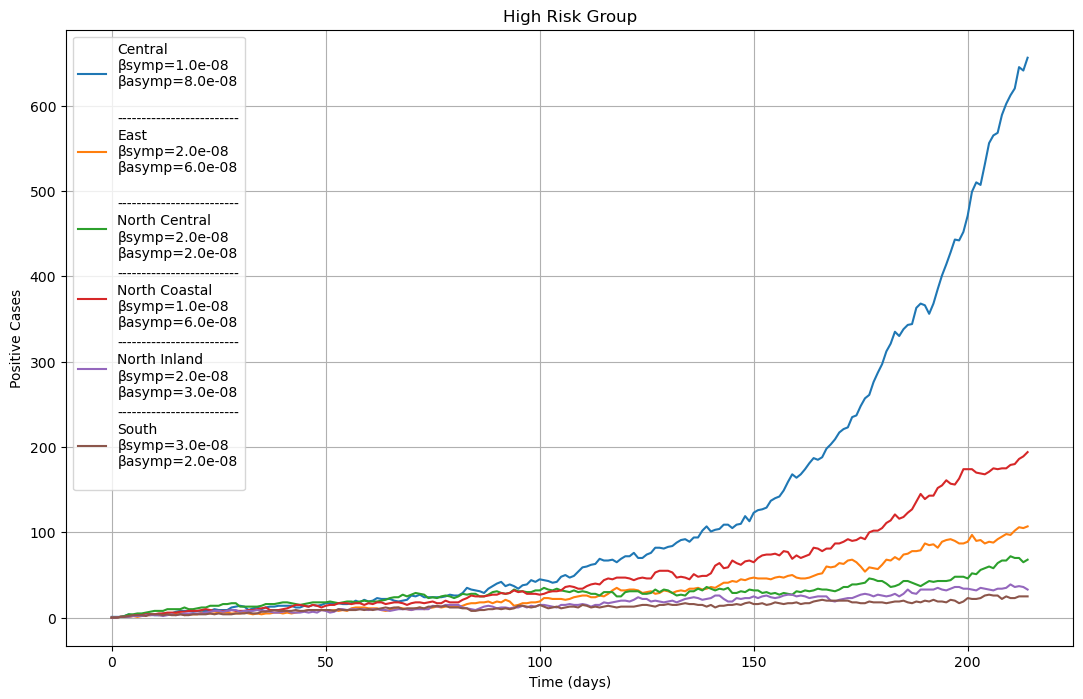

In [309]:
plot_high_result('Central', 'East', 'North Central', 'North Coastal', 'North Inland', 'South', \
                 0, 1, 2, 3, 4, 5, \
                 central_high_v1, east_high_v1, north_central_high_v1, north_coastal_high_v1, north_inland_high_v1, south_high_v1, \
                 central_lsqs_min, east_lsqs_min, north_central_lsqs_min, north_coastal_lsqs_min, north_inland_lsqs_min, south_lsqs_min)

### Low Risk Scenario

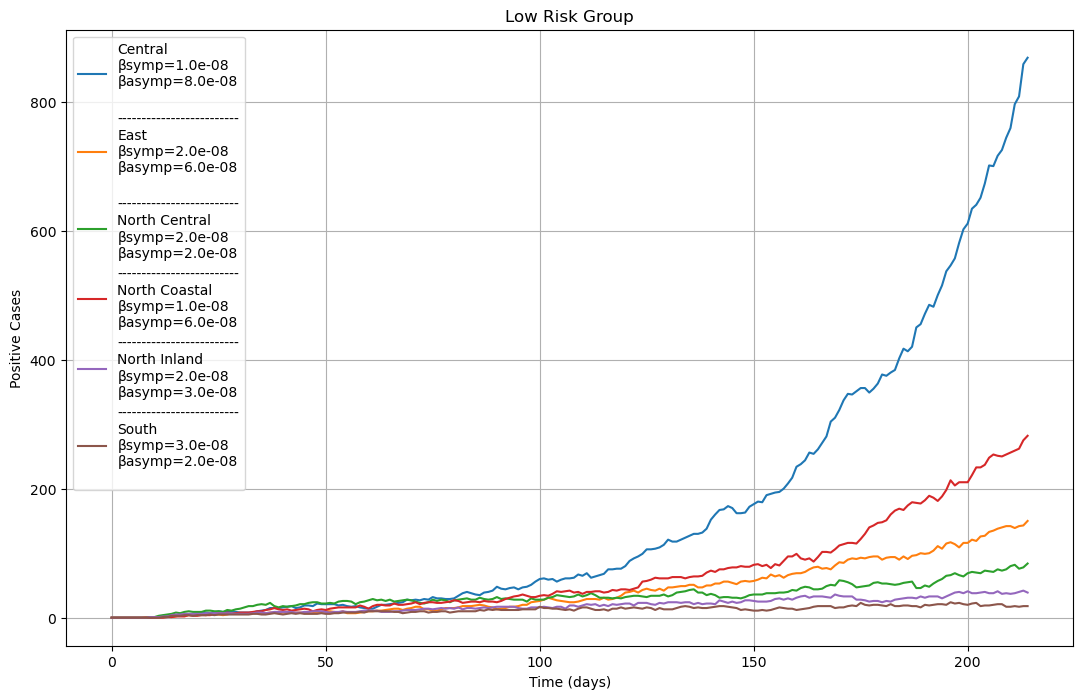

In [311]:
plot_low_result('Central', 'East', 'North Central', 'North Coastal', 'North Inland', 'South', \
                 0, 1, 2, 3, 4, 5, \
                 central_low_v1, east_low_v1, north_central_low_v1, north_coastal_low_v1, north_inland_low_v1, south_low_v1, \
                 central_lsqs_min, east_lsqs_min, north_central_lsqs_min, north_coastal_lsqs_min, north_inland_lsqs_min, south_lsqs_min)

### Total Cases

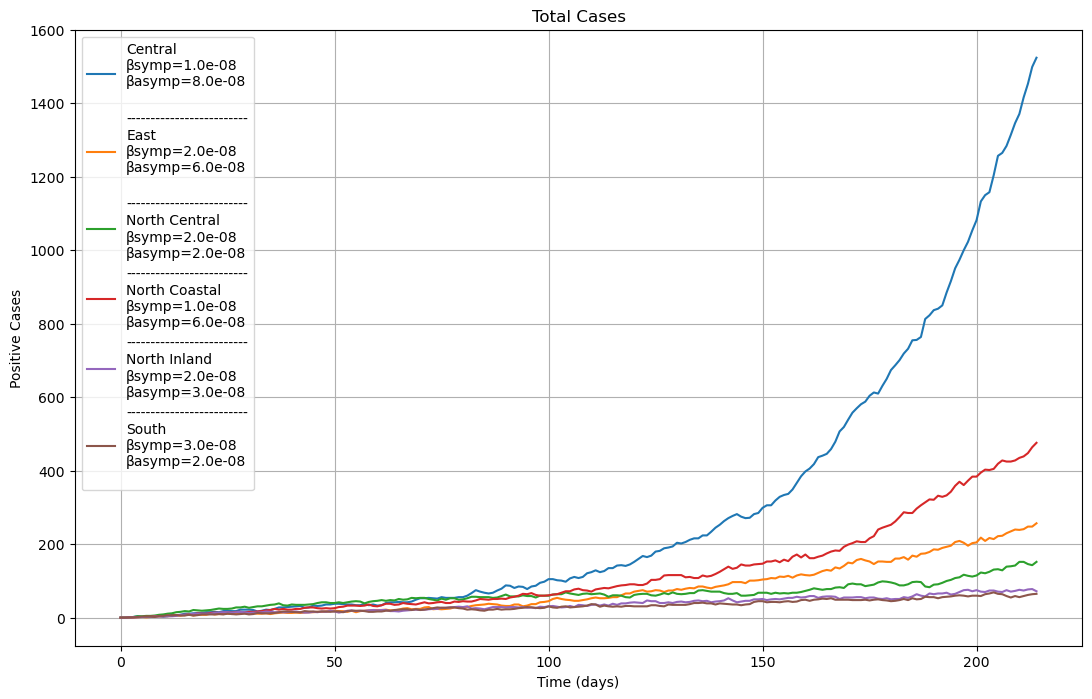

In [315]:
plot_total_result('Central', 'East', 'North Central', 'North Coastal', 'North Inland', 'South', \
                  0, 1, 2, 3, 4, 5, \
                  central_high_v1, east_high_v1, north_central_high_v1, north_coastal_high_v1, north_inland_high_v1, south_high_v1, \
                  central_low_v1, east_low_v1, north_central_low_v1, north_coastal_low_v1, north_inland_low_v1, south_low_v1, \
                  central_lsqs_min, east_lsqs_min, north_central_lsqs_min, north_coastal_lsqs_min, north_inland_lsqs_min, south_lsqs_min)

In [322]:
(central_high_v1['I'][central_lsqs_min.index[0]] + central_low_v1['I'][central_lsqs_min.index[0]])[-1]

1524.0

In [323]:
(east_high_v1['I'][east_lsqs_min.index[0]] + east_low_v1['I'][east_lsqs_min.index[0]])[-1] + \
(north_central_high_v1['I'][north_central_lsqs_min.index[0]] + north_central_low_v1['I'][north_central_lsqs_min.index[0]])[-1] + \
(north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]])[-1] + \
(north_inland_high_v1['I'][north_inland_lsqs_min.index[0]] + north_inland_low_v1['I'][north_inland_lsqs_min.index[0]])[-1] + \
(south_high_v1['I'][south_lsqs_min.index[0]] + south_low_v1['I'][south_lsqs_min.index[0]])[-1]

1000.0

## Plot Diff

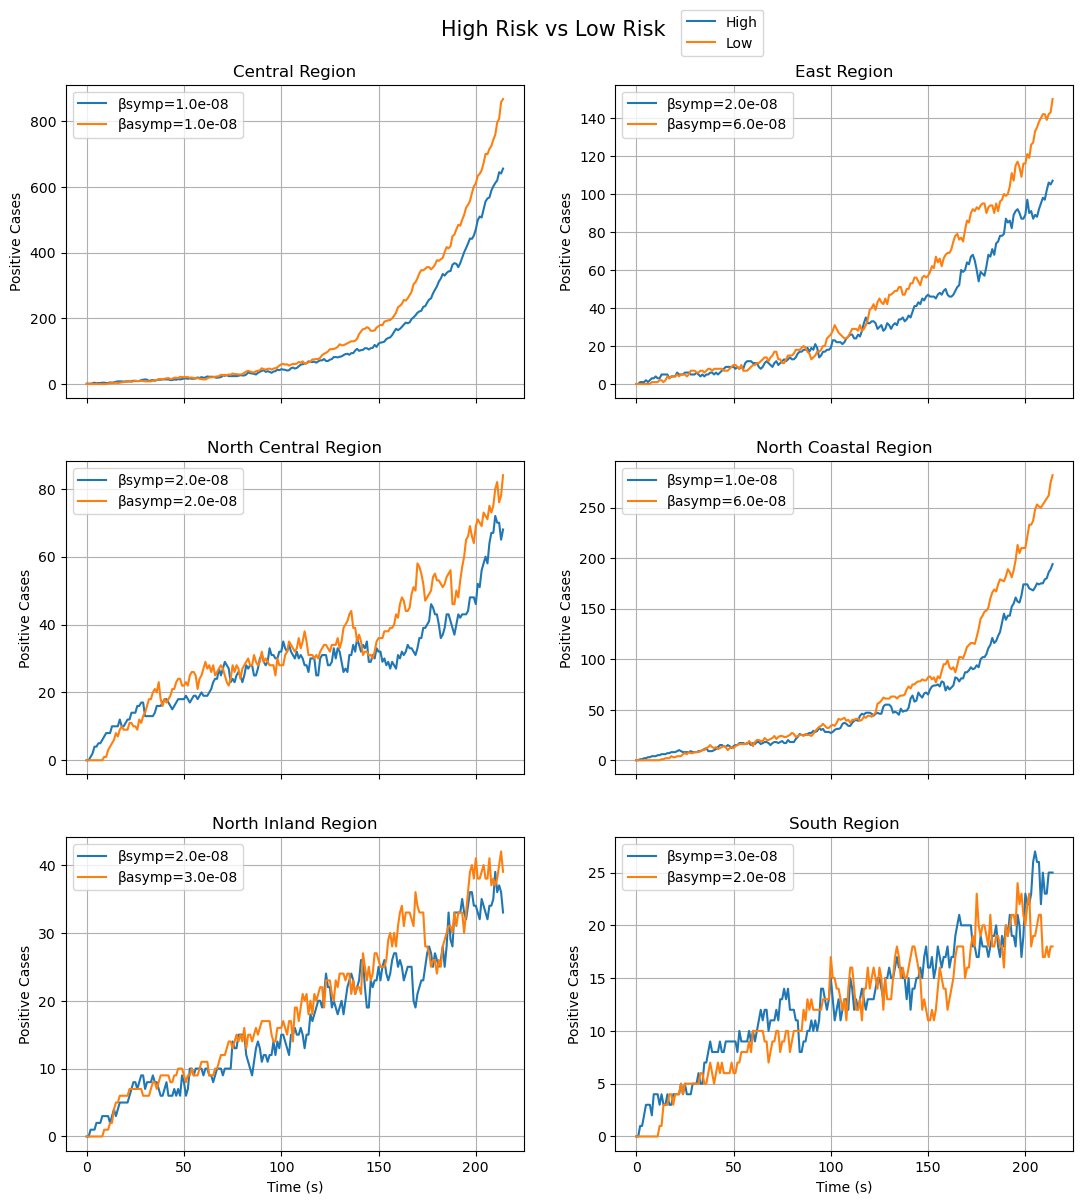

In [384]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 13), sharex=True)

ax1.plot(time, central_high_v1['I'][central_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'Central']['Beta Symptomatic'][0]))
ax1.plot(time, central_low_v1['I'][central_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'Central']['Beta Symptomatic'][0]))
ax1.set_ylabel('Positive Cases')
ax1.set_title('Central Region')
ax1.grid()
ax1.legend()

ax2.plot(time, east_high_v1['I'][east_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'East']['Beta Symptomatic'][1]))
ax2.plot(time, east_low_v1['I'][east_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'East']['Beta Asymptomatic'][1]))
ax2.set_ylabel('Positive Cases')
ax2.set_title('East Region')
ax2.grid()
ax2.legend()

ax3.plot(time, north_central_high_v1['I'][north_central_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'North Central']['Beta Symptomatic'][2]))
ax3.plot(time, north_central_low_v1['I'][north_central_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'North Central']['Beta Asymptomatic'][2]))
ax3.set_ylabel('Positive Cases')
ax3.set_title('North Central Region')
ax3.grid()
ax3.legend()

ax4.plot(time, north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'North Coastal']['Beta Symptomatic'][3]))
ax4.plot(time, north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'North Coastal']['Beta Asymptomatic'][3]))
ax4.set_ylabel('Positive Cases')
ax4.set_title('North Coastal Region')
ax4.grid()
ax4.legend()

ax5.plot(time, north_inland_high_v1['I'][north_inland_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'North Inland']['Beta Symptomatic'][4]))
ax5.plot(time, north_inland_low_v1['I'][north_inland_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'North Inland']['Beta Asymptomatic'][4]))
ax5.set_ylabel('Positive Cases')
ax5.set_xlabel('Time (s)')
ax5.set_title('North Inland Region')
ax5.grid()
ax5.legend()

ax6.plot(time, south_high_v1['I'][south_lsqs_min.index[0]], label='βsymp={}'.format(parameters.loc[parameters['Region'] == 'South']['Beta Symptomatic'][5]))
ax6.plot(time, south_low_v1['I'][south_lsqs_min.index[0]], label='βasymp={}'.format(parameters.loc[parameters['Region'] == 'South']['Beta Asymptomatic'][5]))
ax6.set_ylabel('Positive Cases')
ax6.set_xlabel('Time (s)')
ax6.set_title('South Region')
ax6.grid()
ax6.legend()

fig.subplots_adjust(hspace=0.2, top=0.93)

fig.suptitle("High Risk vs Low Risk", fontsize=15)

labels = ['High', 'Low']
fig.legend(labels=labels, loc='center', bbox_to_anchor=(0.63, 0.97), borderaxespad=0)
plt.show()

In [336]:
np.sum(south_high_v1['I'][south_lsqs_min.index[0]]) * 100 / ( np.sum(south_high_v1['I'][south_lsqs_min.index[0]]) +  np.sum(south_low_v1['I'][south_lsqs_min.index[0]]) )

51.87476565429321

## Model vs Data

In [356]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region (2)')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date','Diff']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

In [357]:
# Count daily cases
central_daily_total = central['Total Rate (Suppressed)'].diff()
central_daily_raw = central['Case Count (Raw)'].diff()
east_daily_total = east['Total Rate (Suppressed)'].diff()
east_daily_raw = east['Case Count (Raw)'].diff()
north_central_daily_total = north_central['Total Rate (Suppressed)'].diff()
north_central_daily_raw = north_central['Case Count (Raw)'].diff()
north_coastal_daily_total = north_coastal['Total Rate (Suppressed)'].diff()
north_coastal_daily_raw = north_coastal['Case Count (Raw)'].diff()
north_inland_daily_total = north_inland['Total Rate (Suppressed)'].diff()
north_inland_daily_raw = north_inland['Case Count (Raw)'].diff()
south_daily_total = south['Total Rate (Suppressed)'].diff()
south_daily_raw = south['Case Count (Raw)'].diff()

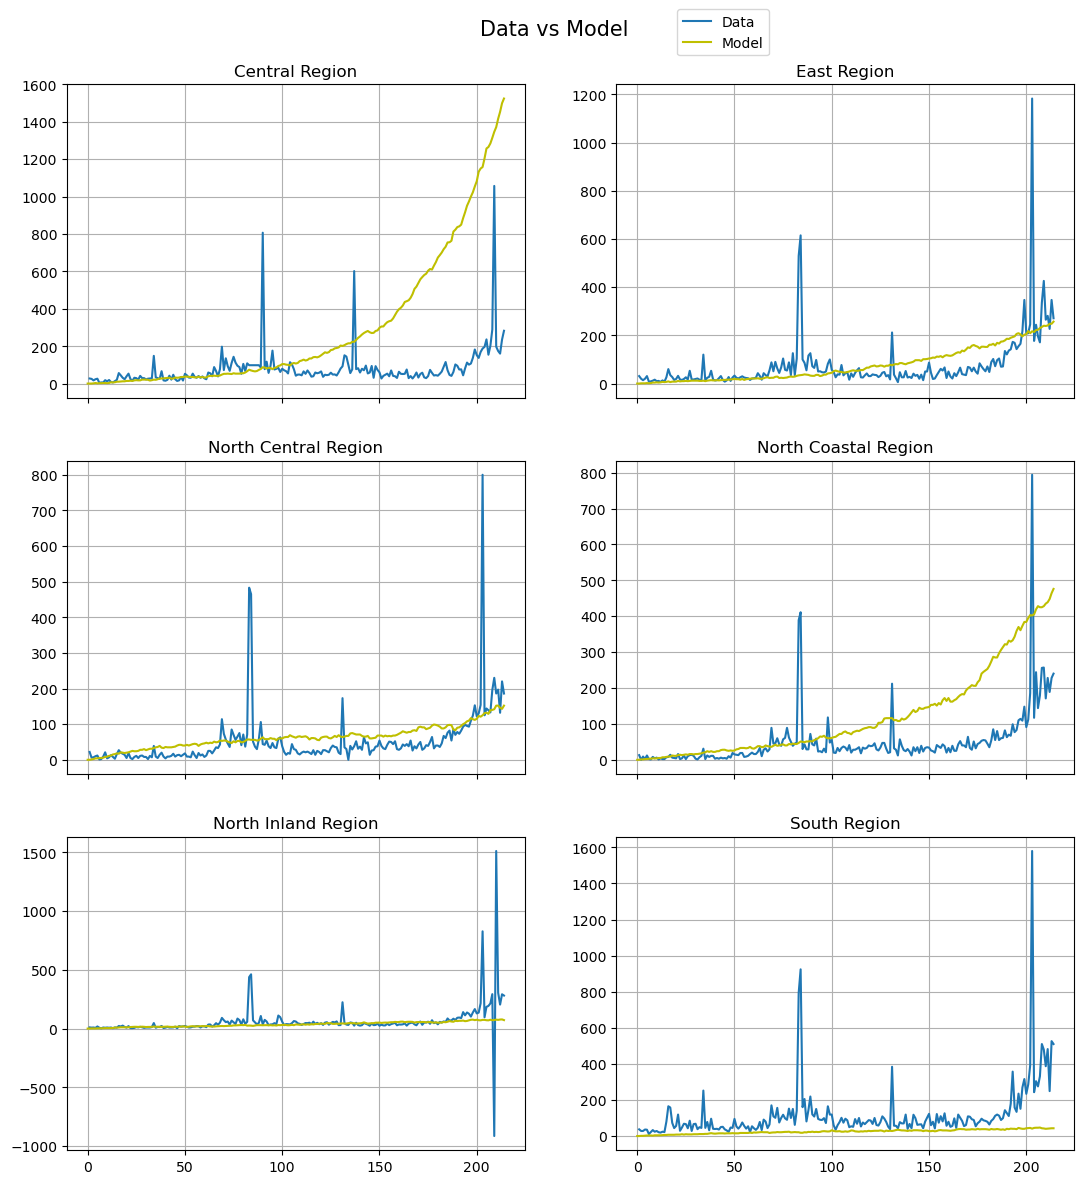

In [385]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 13), sharex=True)

ax1.plot(time, central_daily_raw[:215], label = 'Central Region')
ax1.plot(time, central_high_v1['I'][central_lsqs_min.index[0]] + central_low_v1['I'][central_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax1.grid()
ax1.set_title('Central Region')

ax2.plot(time, east_daily_raw[:215], label = 'East Region')
ax2.plot(time, east_high_v1['I'][east_lsqs_min.index[0]] + east_low_v1['I'][east_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax2.grid()
ax2.set_title('East Region')

ax3.plot(time, north_central_daily_raw[:215], label='North Central Region')
ax3.plot(time, north_central_high_v1['I'][north_central_lsqs_min.index[0]] + north_central_low_v1['I'][north_central_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax3.grid()
ax3.set_title('North Central Region')

ax4.plot(time, north_coastal_daily_raw[:215], label='North Coastal Region')
ax4.plot(time, north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax4.grid()
ax4.set_title('North Coastal Region')

ax5.plot(time, north_inland_daily_raw[:215], label='North Inland Region')
ax5.plot(time, north_inland_high_v1['I'][north_inland_lsqs_min.index[0]] + north_inland_low_v1['I'][north_inland_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax5.grid()
ax5.set_title('North Inland Region')

ax6.plot(time, south_daily_raw[:215], label='South Region')
ax6.plot(time, south_high_v1['I'][south_lsqs_min.index[0]] + south_low_v1['I'][south_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax6.grid()
ax6.set_title('South Region')

fig.subplots_adjust(hspace=0.2, top=0.93)

fig.suptitle("Data vs Model", fontsize=15)

labels = ['Data', 'Model']
fig.legend(labels=labels, loc='center', bbox_to_anchor=(0.63, 0.97), borderaxespad=0)
plt.show()

### Intervention Test

In [452]:
def SEIAR_model_modified(S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init, S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init,\
               S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init, S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init,\
               S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init, S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init,\
               S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init, S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init,\
               S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init, S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init,\
               S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init, S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init, \
               beta_sym, beta_asym, gamma, theta, lamb, delta, frac):
   
    '''
    Use the SEIAR model to predict the number of people in each compartment at each time step.
    The MC simulation estimates the mean of the number of people in each compartment at each time step.
    ------------------------------------------------------------------------------------------
    Input:
        Initial population in each compartment (line 1-6)
        beta_sym: transmission rate of symptomatic individuals -> to be calibrated
        beta_asym: transmission rate of asymptomatic individuals -> to be calibrated
        gamma: rate of recovery
        theta: rate of progression from exposed to infectious
        lamb: rate of progression from infectious to asymptomatic
        delta: rate of progression from asymptomatic to recovered
    
    Output:
        Populations for SEIAR from each region
    '''

    # Simulation length (in days)
    t = 214
    
    # Initialise arrays to store populations
    C_H = np.zeros((t+1, 5))
    C_L = np.zeros((t+1, 5))

    E_H = np.zeros((t+1, 5))
    E_L = np.zeros((t+1, 5))

    NCen_H = np.zeros((t+1, 5))
    NCen_L = np.zeros((t+1, 5))

    NCoa_H = np.zeros((t+1, 5))
    NCoa_L = np.zeros((t+1, 5))

    NI_H = np.zeros((t+1, 5))
    NI_L = np.zeros((t+1, 5))

    S_H = np.zeros((t+1, 5))
    S_L = np.zeros((t+1, 5))

    # Initial Conditions
    C_H[0][0], C_H[0][1], C_H[0][2], C_H[0][3], C_H[0][4] = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    C_L[0][0], C_L[0][1], C_L[0][2], C_L[0][3], C_L[0][4] = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    E_H[0][0], E_H[0][1], E_H[0][2], E_H[0][3], E_H[0][4] = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    E_L[0][0], E_L[0][1], E_L[0][2], E_L[0][3], E_L[0][4] = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    NCen_H[0][0], NCen_H[0][1], NCen_H[0][2], NCen_H[0][3], NCen_H[0][4] = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    NCen_L[0][0], NCen_L[0][1], NCen_L[0][2], NCen_L[0][3], NCen_L[0][4] = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    NCoa_H[0][0], NCoa_H[0][1], NCoa_H[0][2], NCoa_H[0][3], NCoa_H[0][4] = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    NCoa_L[0][0], NCoa_L[0][1], NCoa_L[0][2], NCoa_L[0][3], NCoa_L[0][4] = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    NI_H[0][0], NI_H[0][1], NI_H[0][2], NI_H[0][3], NI_H[0][4] = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    NI_L[0][0], NI_L[0][1], NI_L[0][2], NI_L[0][3], NI_L[0][4] = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H[0][0], S_H[0][1], S_H[0][2], S_H[0][3], S_H[0][4] = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L[0][0], S_L[0][1], S_L[0][2], S_L[0][3], S_L[0][4] = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init

    # Initialise populations
    S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init


    mob_central_dict = {

        'East': [2518.007912, 1179.226414, 2302.018371], \
        'North_Central': [5431.723516, 1940.995073, 4336.156366], \
        'North_Coastal': [410.088803, 224.745859, 654.88667], \
        'North_Inland': [664.540636, 366.97859, 588.297201], \
        'South': [3640.640873, 1626.007515, 2917.389471]

    }

    mob_east_dict = {

        'Central': [3768.837284, 1440.608412, 2866.137454], \
        'North_Central': [5425.003638, 1919.445416, 4670.294659], \
        'North_Coastal': [483.573126, 191.392576, 473.906442], \
        'North_Inland': [1055.682996, 484.299215, 842.685923], \
        'South': [2488.03862, 980.052445, 2087.730478]

    }

    mob_north_central_dict = {

        'Central': [3657.897354, 1054.592602, 3087.41847], \
        'East': [2111.999373, 871.361025, 2093.514868], \
        'North_Coastal': [1656.53273, 460.539775, 1724.08199], \
        'North_Inland': [2767.349274, 983.942653, 2341.094009], \
        'South': [1257.405478, 596.794501, 1182.745383]

    }

    mob_north_coastal_dict = {

        'Central': [780.166594, 156.644603, 1196.23607], \
        'East': [246.915804, 115.929512, 226.261725], \
        'North_Central': [2547.496323, 631.995693, 1936.045114], \
        'North_Inland': [3898.342286, 1414.099677, 3053.434645], \
        'South': [258.826212, 133.157868, 306.770863]

    }

    mob_north_inland_dict = {

        'Central': [1507.037202, 392.630209, 1305.236506], \
        'East': [1000.642647, 390.292827, 879.488701], \
        'North_Central': [6136.233626, 1687.503238, 4745.989662], \
        'North_Coastal': [5256.002028, 1827.728619, 4981.44469], \
        'South': [607.446061, 255.851188, 534.272639]

    }

    mob_south_dict = {

        'Central': [4053.532554, 1545.91116, 2984.388535], \
        'East': [1970.762799, 828.927306, 1716.573243], \
        'North_Central': [3883.18689, 1374.748533, 3361.535465], \
        'North_Coastal': [391.417326, 147.78653, 331.027812], \
        'North_Inland': [622.229053, 262.674827, 511.746844]

    }

    # Mobility changes for 3 phases -> refer to ./Data/Mobility.ipynb
    for day in range(1, t+1):

        if day <= 70:
            
            # Retrieve mobility changes for each region
            mob_central_east = frac * mob_central_dict['East'][0] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][0] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][0] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][0] / 511660
            mob_central_south = frac * mob_central_dict['South'][0] / 511660

            mob_east_central = frac * mob_east_dict['Central'][0] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][0] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][0] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][0] / 488330
            mob_east_south = frac * mob_east_dict['South'][0] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][0] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][0] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][0] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][0] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][0] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][0] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][0] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][0] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][0] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][0] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][0] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][0] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][0] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][0] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][0] / 602000

            mob_south_central = frac * mob_south_dict['Central'][0] / 500076
            mob_south_east = frac * mob_south_dict['East'][0] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][0] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][0] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][0] / 500076
           
        elif day > 70 and day <= 80:

            # Same as above
            mob_central_east = frac * mob_central_dict['East'][1] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][1] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][1] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][1] / 511660
            mob_central_south = frac * mob_central_dict['South'][1] / 511660

            mob_east_central = frac * mob_east_dict['Central'][1] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][1] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][1] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][1] / 488330
            mob_east_south = frac * mob_east_dict['South'][1] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][1] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][1] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][1] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][1] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][1] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][1] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][1] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][1] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][1] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][1] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][1] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][1] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][1] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][1] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][1] / 602000

            mob_south_central = frac * mob_south_dict['Central'][1] / 500076
            mob_south_east = frac * mob_south_dict['East'][1] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][1] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][1] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][1] / 500076

        else:

            # Same as above
            mob_central_east = frac * mob_central_dict['East'][2] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][2] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][2] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][2] / 511660
            mob_central_south = frac * mob_central_dict['South'][2] / 511660

            mob_east_central = frac * mob_east_dict['Central'][2] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][2] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][2] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][2] / 488330
            mob_east_south = frac * mob_east_dict['South'][2] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][2] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][2] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][2] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][2] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][2] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][2] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][2] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][2] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][2] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][2] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][2] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][2] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][2] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][2] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][2] / 602000

            mob_south_central = frac * mob_south_dict['Central'][2] / 500076
            mob_south_east = frac * mob_south_dict['East'][2] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][2] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][2] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][2] / 500076

        
        # Compute Monte Carlo simulation using biniomial distribution
        # n = initial population, p = probability of event from the model
        Central_High = {'S_to_E': np.random.binomial(S_H_C, (beta_sym['Central'] * (I_H_C + I_L_C)) + (beta_asym['Central'] * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_H_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_C, delta) }

        Central_Low = { 'S_to_E': np.random.binomial(S_L_C, (beta_sym['Central'] * (I_H_C + I_L_C)) + (beta_asym['Central'] * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_L_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_C, delta) }

        East_High = { 'S_to_E': np.random.binomial(S_H_E, (beta_sym['East'] * (I_H_E + I_L_E)) + (beta_asym['East'] * (A_H_E + A_L_E))),
                      'E_to_I': np.random.binomial(E_H_E, gamma*theta),
                      'E_to_A': np.random.binomial(E_H_E, gamma*(1-theta)),
                      'I_to_R': np.random.binomial(I_H_E, delta + lamb),
                      'A_to_R': np.random.binomial(A_H_E, delta) }

        East_Low = {    'S_to_E': np.random.binomial(S_L_E, (beta_sym['East'] * (I_H_E + I_L_E)) + (beta_asym['East'] * (A_H_E + A_L_E))),
                        'E_to_I': np.random.binomial(E_L_E, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_E, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_E, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_E, delta) }
        
        North_Central_High = {  'S_to_E': np.random.binomial(S_H_NCen, (beta_sym['North Central'] * (I_H_NCen + I_L_NCen)) + (beta_asym['North Central'] * (A_H_NCen + A_L_NCen))),
                                'E_to_I': np.random.binomial(E_H_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCen, delta) }
        
        North_Central_Low = {   'S_to_E': np.random.binomial(S_L_NCen, (beta_sym['North Central'] * (I_H_NCen + I_L_NCen) + (beta_asym['North Central'] * (A_H_NCen + A_L_NCen)))),
                                'E_to_I': np.random.binomial(E_L_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCen, delta) }

        North_Coastal_High = {  'S_to_E': np.random.binomial(S_H_NCoa, (beta_sym['North Coastal'] * (I_H_NCoa + I_L_NCoa)) + (beta_asym['North Coastal'] * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_H_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCoa, delta) }
        
        North_Coastal_Low = {   'S_to_E': np.random.binomial(S_L_NCoa, (beta_sym['North Coastal'] * (I_H_NCoa + I_L_NCoa)) + (beta_asym['North Coastal'] * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_L_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCoa, delta) }
        
        North_Inland_High = {   'S_to_E': np.random.binomial(S_H_NI, (beta_sym['North Inland'] * (I_H_NI + I_L_NI)) + (beta_asym['North Inland'] * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_H_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NI, delta) }

        North_Inland_Low = {    'S_to_E': np.random.binomial(S_L_NI, (beta_sym['North Inland'] * (I_H_NI + I_L_NI)) + (beta_asym['North Inland'] * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_L_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NI, delta) }
        
        South_High = {  'S_to_E': np.random.binomial(S_H_S, (beta_sym['South'] * (I_H_S + I_L_S)) + (beta_asym['South'] * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_H_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_S, delta) }

        South_Low = {   'S_to_E': np.random.binomial(S_L_S, (beta_sym['South'] * (I_H_S + I_L_S)) + (beta_asym['South'] * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_L_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_S, delta) }
                                
        # Update populations for SEAIR
        # np.max is used to ensure that the population does not go negative
        Central_High_S_new = np.max(S_H_C - Central_High['S_to_E'] + \
            (mob_east_central*S_H_E) + (mob_north_central_central*S_H_NCen) + (mob_north_coastal_central*S_H_NCoa) + (mob_north_inland_central*S_H_NI) + (mob_south_central*S_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_H_C), \
            0)
        Central_High_E_new = np.max(E_H_C + Central_High['S_to_E'] - Central_High['E_to_I'] - Central_High['E_to_A'] + \
            (mob_east_central*E_H_E) + (mob_north_central_central*E_H_NCen) + (mob_north_coastal_central*E_H_NCoa) + (mob_north_inland_central*E_H_NI) + (mob_south_central*E_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_H_C), \
            0)
        Central_High_I_new = np.max(I_H_C + Central_High['E_to_I'] - Central_High['I_to_R'] + \
            (mob_east_central*I_H_E) + (mob_north_central_central*I_H_NCen) + (mob_north_coastal_central*I_H_NCoa) + (mob_north_inland_central*I_H_NI) + (mob_south_central*I_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_H_C), \
            0)
        Central_High_A_new = np.max(A_H_C + Central_High['E_to_A'] - Central_High['A_to_R'] + \
            (mob_east_central*A_H_E) + (mob_north_central_central*A_H_NCen) + (mob_north_coastal_central*A_H_NCoa) + (mob_north_inland_central*A_H_NI) + (mob_south_central*A_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_H_C), \
            0)
        Central_High_R_new = np.max(R_H_C + Central_High['I_to_R'] + Central_High['A_to_R'] + \
            (mob_east_central*R_H_E) + (mob_north_central_central*R_H_NCen) + (mob_north_coastal_central*R_H_NCoa) + (mob_north_inland_central*R_H_NI) + (mob_south_central*R_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_H_C), \
            0)

        Central_Low_S_new = np.max(S_L_C - Central_Low['S_to_E'] + \
            (mob_east_central*S_L_E) + (mob_north_central_central*S_L_NCen) + (mob_north_coastal_central*S_L_NCoa) + (mob_north_inland_central*S_L_NI) + (mob_south_central*S_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_L_C), \
            0)
        Central_Low_E_new = np.max(E_L_C + Central_Low['S_to_E'] - Central_Low['E_to_I'] - Central_Low['E_to_A'] + \
            (mob_east_central*E_L_E) + (mob_north_central_central*E_L_NCen) + (mob_north_coastal_central*E_L_NCoa) + (mob_north_inland_central*E_L_NI) + (mob_south_central*E_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_L_C), \
            0)
        Central_Low_I_new = np.max(I_L_C + Central_Low['E_to_I'] - Central_Low['I_to_R'] + \
            (mob_east_central*I_L_E) + (mob_north_central_central*I_L_NCen) + (mob_north_coastal_central*I_L_NCoa) + (mob_north_inland_central*I_L_NI) + (mob_south_central*I_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_L_C), \
            0)
        Central_Low_A_new = np.max(A_L_C + Central_Low['E_to_A'] - Central_Low['A_to_R'] + \
            (mob_east_central*A_L_E) + (mob_north_central_central*A_L_NCen) + (mob_north_coastal_central*A_L_NCoa) + (mob_north_inland_central*A_L_NI) + (mob_south_central*A_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_L_C), \
            0)
        Central_Low_R_new = np.max(R_L_C + Central_Low['I_to_R'] + Central_Low['A_to_R'] + \
            (mob_east_central*R_L_E) + (mob_north_central_central*R_L_NCen) + (mob_north_coastal_central*R_L_NCoa) + (mob_north_inland_central*R_L_NI) + (mob_south_central*R_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_L_C), \
            0)
        
        East_High_S_new = np.max(S_H_E - East_High['S_to_E'] + \
            (mob_central_east*S_H_C) + (mob_north_central_east*S_H_NCen) + (mob_north_coastal_east*S_H_NCoa) + (mob_north_inland_east*S_H_NI) + (mob_south_east*S_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_H_E), \
            0)
        East_High_E_new = np.max(E_H_E + East_High['S_to_E'] - East_High['E_to_I'] - East_High['E_to_A'] + \
            (mob_central_east*E_H_C) + (mob_north_central_east*E_H_NCen) + (mob_north_coastal_east*E_H_NCoa) + (mob_north_inland_east*E_H_NI) + (mob_south_east*E_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_H_E), \
            0)
        East_High_I_new = np.max(I_H_E + East_High['E_to_I'] - East_High['I_to_R'] + \
            (mob_central_east*I_H_C) + (mob_north_central_east*I_H_NCen) + (mob_north_coastal_east*I_H_NCoa) + (mob_north_inland_east*I_H_NI) + (mob_south_east*I_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_H_E), \
            0)
        East_High_A_new = np.max(A_H_E + East_High['E_to_A'] - East_High['A_to_R'] + \
            (mob_central_east*A_H_C) + (mob_north_central_east*A_H_NCen) + (mob_north_coastal_east*A_H_NCoa) + (mob_north_inland_east*A_H_NI) + (mob_south_east*A_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_H_E), \
            0)
        East_High_R_new = np.max(R_H_E + East_High['I_to_R'] + East_High['A_to_R'] + \
            (mob_central_east*R_H_C) + (mob_north_central_east*R_H_NCen) + (mob_north_coastal_east*R_H_NCoa) + (mob_north_inland_east*R_H_NI) + (mob_south_east*R_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_H_E), \
            0)

        East_Low_S_new = np.max(S_L_E - East_Low['S_to_E'] + \
            (mob_central_east*S_L_C) + (mob_north_central_east*S_L_NCen) + (mob_north_coastal_east*S_L_NCoa) + (mob_north_inland_east*S_L_NI) + (mob_south_east*S_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_L_E), \
            0)
        East_Low_E_new = np.max(E_L_E + East_Low['S_to_E'] - East_Low['E_to_I'] - East_Low['E_to_A'] + \
            (mob_central_east*E_L_C) + (mob_north_central_east*E_L_NCen) + (mob_north_coastal_east*E_L_NCoa) + (mob_north_inland_east*E_L_NI) + (mob_south_east*E_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_L_E), \
            0)
        East_Low_I_new = np.max(I_L_E + East_Low['E_to_I'] - East_Low['I_to_R'] + \
            (mob_central_east*I_L_C) + (mob_north_central_east*I_L_NCen) + (mob_north_coastal_east*I_L_NCoa) + (mob_north_inland_east*I_L_NI) + (mob_south_east*I_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_L_E), \
            0)
        East_Low_A_new = np.max(A_L_E + East_Low['E_to_A'] - East_Low['A_to_R'] + \
            (mob_central_east*A_L_C) + (mob_north_central_east*A_L_NCen) + (mob_north_coastal_east*A_L_NCoa) + (mob_north_inland_east*A_L_NI) + (mob_south_east*A_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_L_E), \
            0)
        East_Low_R_new = np.max(R_L_E + East_Low['I_to_R'] + East_Low['A_to_R'] + \
            (mob_central_east*R_L_C) + (mob_north_central_east*R_L_NCen) + (mob_north_coastal_east*R_L_NCoa) + (mob_north_inland_east*R_L_NI) + (mob_south_east*R_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_L_E), \
            0)
        
        North_Central_High_S_new = np.max(S_H_NCen - North_Central_High['S_to_E'] + \
            (mob_central_north_central*S_H_C) + (mob_east_north_central*S_H_E) + (mob_north_coastal_north_central*S_H_NCoa) + (mob_north_inland_north_central*S_H_NI) + (mob_south_north_central*S_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_H_NCen), \
            0)
        North_Central_High_E_new = np.max(E_H_NCen + North_Central_High['S_to_E'] - North_Central_High['E_to_I'] - North_Central_High['E_to_A'] + \
            (mob_central_north_central*E_H_C) + (mob_east_north_central*E_H_E) + (mob_north_coastal_north_central*E_H_NCoa) + (mob_north_inland_north_central*E_H_NI) + (mob_south_north_central*E_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_H_NCen), \
            0)
        North_Central_High_I_new = np.max(I_H_NCen + North_Central_High['E_to_I'] - North_Central_High['I_to_R'] + \
            (mob_central_north_central*I_H_C) + (mob_east_north_central*I_H_E) + (mob_north_coastal_north_central*I_H_NCoa) + (mob_north_inland_north_central*I_H_NI) + (mob_south_north_central*I_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_H_NCen), \
            0)
        North_Central_High_A_new = np.max(A_H_NCen + North_Central_High['E_to_A'] - North_Central_High['A_to_R'] + \
            (mob_central_north_central*A_H_C) + (mob_east_north_central*A_H_E) + (mob_north_coastal_north_central*A_H_NCoa) + (mob_north_inland_north_central*A_H_NI) + (mob_south_north_central*A_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_H_NCen), \
            0)
        North_Central_High_R_new = np.max(R_H_NCen + North_Central_High['I_to_R'] + North_Central_High['A_to_R'] + \
            (mob_central_north_central*R_H_C) + (mob_east_north_central*R_H_E) + (mob_north_coastal_north_central*R_H_NCoa) + (mob_north_inland_north_central*R_H_NI) + (mob_south_north_central*R_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_H_NCen), \
            0)

        North_Central_Low_S_new = np.max(S_L_NCen - North_Central_Low['S_to_E'] + \
            (mob_central_north_central*S_L_C) + (mob_east_north_central*S_L_E) + (mob_north_coastal_north_central*S_L_NCoa) + (mob_north_inland_north_central*S_L_NI) + (mob_south_north_central*S_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_L_NCen), \
            0)
        North_Central_Low_E_new = np.max(E_L_NCen + North_Central_Low['S_to_E'] - North_Central_Low['E_to_I'] - North_Central_Low['E_to_A'] + \
            (mob_central_north_central*E_L_C) + (mob_east_north_central*E_L_E) + (mob_north_coastal_north_central*E_L_NCoa) + (mob_north_inland_north_central*E_L_NI) + (mob_south_north_central*E_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_L_NCen), \
            0)
        North_Central_Low_I_new = np.max(I_L_NCen + North_Central_Low['E_to_I'] - North_Central_Low['I_to_R'] + \
            (mob_central_north_central*I_L_C) + (mob_east_north_central*I_L_E) + (mob_north_coastal_north_central*I_L_NCoa) + (mob_north_inland_north_central*I_L_NI) + (mob_south_north_central*I_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_L_NCen), \
            0)
        North_Central_Low_A_new = np.max(A_L_NCen + North_Central_Low['E_to_A'] - North_Central_Low['A_to_R'] + \
            (mob_central_north_central*A_L_C) + (mob_east_north_central*A_L_E) + (mob_north_coastal_north_central*A_L_NCoa) + (mob_north_inland_north_central*A_L_NI) + (mob_south_north_central*A_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_L_NCen), \
            0)
        North_Central_Low_R_new = np.max(R_L_NCen + North_Central_Low['I_to_R'] + North_Central_Low['A_to_R'] + \
            (mob_central_north_central*R_L_C) + (mob_east_north_central*R_L_E) + (mob_north_coastal_north_central*R_L_NCoa) + (mob_north_inland_north_central*R_L_NI) + (mob_south_north_central*R_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_L_NCen), \
            0)

        North_Coastal_High_S_new = np.max(S_H_NCoa - North_Coastal_High['S_to_E'] + \
            (mob_central_north_coastal*S_H_C) + (mob_east_north_coastal*S_H_E) + (mob_north_central_north_coastal*S_H_NCen) + (mob_north_inland_north_coastal*S_H_NI) + (mob_south_north_coastal*S_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_H_NCoa), \
            0)
        North_Coastal_High_E_new = np.max(E_H_NCoa + North_Coastal_High['S_to_E'] - North_Coastal_High['E_to_I'] - North_Coastal_High['E_to_A'] + \
            (mob_central_north_coastal*E_H_C) + (mob_east_north_coastal*E_H_E) + (mob_north_central_north_coastal*E_H_NCen) + (mob_north_inland_north_coastal*E_H_NI) + (mob_south_north_coastal*E_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_H_NCoa), \
            0)
        North_Coastal_High_I_new = np.max(I_H_NCoa + North_Coastal_High['E_to_I'] - North_Coastal_High['I_to_R'] + \
            (mob_central_north_coastal*I_H_C) + (mob_east_north_coastal*I_H_E) + (mob_north_central_north_coastal*I_H_NCen) + (mob_north_inland_north_coastal*I_H_NI) + (mob_south_north_coastal*I_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_H_NCoa), \
            0)
        North_Coastal_High_A_new = np.max(A_H_NCoa + North_Coastal_High['E_to_A'] - North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*A_H_C) + (mob_east_north_coastal*A_H_E) + (mob_north_central_north_coastal*A_H_NCen) + (mob_north_inland_north_coastal*A_H_NI) + (mob_south_north_coastal*A_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_H_NCoa), \
            0)
        North_Coastal_High_R_new = np.max(R_H_NCoa + North_Coastal_High['I_to_R'] + North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*R_H_C) + (mob_east_north_coastal*R_H_E) + (mob_north_central_north_coastal*R_H_NCen) + (mob_north_inland_north_coastal*R_H_NI) + (mob_south_north_coastal*R_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_H_NCoa), \
            0)

        North_Coastal_Low_S_new = np.max(S_L_NCoa - North_Coastal_Low['S_to_E'] + \
            (mob_central_north_coastal*S_L_C) + (mob_east_north_coastal*S_L_E) + (mob_north_central_north_coastal*S_L_NCen) + (mob_north_inland_north_coastal*S_L_NI) + (mob_south_north_coastal*S_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_L_NCoa), \
            0)
        North_Coastal_Low_E_new = np.max(E_L_NCoa + North_Coastal_Low['S_to_E'] - North_Coastal_Low['E_to_I'] - North_Coastal_Low['E_to_A'] + \
            (mob_central_north_coastal*E_L_C) + (mob_east_north_coastal*E_L_E) + (mob_north_central_north_coastal*E_L_NCen) + (mob_north_inland_north_coastal*E_L_NI) + (mob_south_north_coastal*E_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_L_NCoa), \
            0)
        North_Coastal_Low_I_new = np.max(I_L_NCoa + North_Coastal_Low['E_to_I'] - North_Coastal_Low['I_to_R'] + \
            (mob_central_north_coastal*I_L_C) + (mob_east_north_coastal*I_L_E) + (mob_north_central_north_coastal*I_L_NCen) + (mob_north_inland_north_coastal*I_L_NI) + (mob_south_north_coastal*I_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_L_NCoa), \
            0)
        North_Coastal_Low_A_new = np.max(A_L_NCoa + North_Coastal_Low['E_to_A'] - North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*A_L_C) + (mob_east_north_coastal*A_L_E) + (mob_north_central_north_coastal*A_L_NCen) + (mob_north_inland_north_coastal*A_L_NI) + (mob_south_north_coastal*A_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_L_NCoa), \
            0)
        North_Coastal_Low_R_new = np.max(R_L_NCoa + North_Coastal_Low['I_to_R'] + North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*R_L_C) + (mob_east_north_coastal*R_L_E) + (mob_north_central_north_coastal*R_L_NCen) + (mob_north_inland_north_coastal*R_L_NI) + (mob_south_north_coastal*R_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_L_NCoa), \
            0)

        North_Inland_High_S_new = np.max(S_H_NI - North_Inland_High['S_to_E'] + \
            (mob_central_north_inland*S_H_C) + (mob_east_north_inland*S_H_E) + (mob_north_central_north_inland*S_H_NCen) + (mob_north_coastal_north_inland*S_H_NCoa) + (mob_south_north_inland*S_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_H_NI), \
            0)
        North_Inland_High_E_new = np.max(E_H_NI + North_Inland_High['S_to_E'] - North_Inland_High['E_to_I'] - North_Inland_High['E_to_A'] + \
            (mob_central_north_inland*E_H_C) + (mob_east_north_inland*E_H_E) + (mob_north_central_north_inland*E_H_NCen) + (mob_north_coastal_north_inland*E_H_NCoa) + (mob_south_north_inland*E_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_H_NI), \
            0)
        North_Inland_High_I_new = np.max(I_H_NI + North_Inland_High['E_to_I'] - North_Inland_High['I_to_R'] + \
            (mob_central_north_inland*I_H_C) + (mob_east_north_inland*I_H_E) + (mob_north_central_north_inland*I_H_NCen) + (mob_north_coastal_north_inland*I_H_NCoa) + (mob_south_north_inland*I_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_H_NI), \
            0)
        North_Inland_High_A_new = np.max(A_H_NI + North_Inland_High['E_to_A'] - North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*A_H_C) + (mob_east_north_inland*A_H_E) + (mob_north_central_north_inland*A_H_NCen) + (mob_north_coastal_north_inland*A_H_NCoa) + (mob_south_north_inland*A_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_H_NI), \
            0)
        North_Inland_High_R_new = np.max(R_H_NI + North_Inland_High['I_to_R'] + North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*R_H_C) + (mob_east_north_inland*R_H_E) + (mob_north_central_north_inland*R_H_NCen) + (mob_north_coastal_north_inland*R_H_NCoa) + (mob_south_north_inland*R_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_H_NI), \
            0)

        North_Inland_Low_S_new = np.max(S_L_NI - North_Inland_Low['S_to_E'] + \
            (mob_central_north_inland*S_L_C) + (mob_east_north_inland*S_L_E) + (mob_north_central_north_inland*S_L_NCen) + (mob_north_coastal_north_inland*S_L_NCoa) + (mob_south_north_inland*S_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_L_NI), \
            0)
        North_Inland_Low_E_new = np.max(E_L_NI + North_Inland_Low['S_to_E'] - North_Inland_Low['E_to_I'] - North_Inland_Low['E_to_A'] + \
            (mob_central_north_inland*E_L_C) + (mob_east_north_inland*E_L_E) + (mob_north_central_north_inland*E_L_NCen) + (mob_north_coastal_north_inland*E_L_NCoa) + (mob_south_north_inland*E_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_L_NI), \
            0)
        North_Inland_Low_I_new = np.max(I_L_NI + North_Inland_Low['E_to_I'] - North_Inland_Low['I_to_R'] + \
            (mob_central_north_inland*I_L_C) + (mob_east_north_inland*I_L_E) + (mob_north_central_north_inland*I_L_NCen) + (mob_north_coastal_north_inland*I_L_NCoa) + (mob_south_north_inland*I_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_L_NI), \
            0)
        North_Inland_Low_A_new = np.max(A_L_NI + North_Inland_Low['E_to_A'] - North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*A_L_C) + (mob_east_north_inland*A_L_E) + (mob_north_central_north_inland*A_L_NCen) + (mob_north_coastal_north_inland*A_L_NCoa) + (mob_south_north_inland*A_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_L_NI), \
            0)
        North_Inland_Low_R_new = np.max(R_L_NI + North_Inland_Low['I_to_R'] + North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*R_L_C) + (mob_east_north_inland*R_L_E) + (mob_north_central_north_inland*R_L_NCen) + (mob_north_coastal_north_inland*R_L_NCoa) + (mob_south_north_inland*R_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_L_NI), \
            0)

        South_High_S_new = np.max(S_H_S - South_High['S_to_E'] + \
            (mob_central_south*S_H_C) + (mob_east_south*S_H_E) + (mob_north_central_south*S_H_NCen) + (mob_north_coastal_south*S_H_NCoa) + (mob_north_inland_south*S_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_H_S), \
            0)
        South_High_E_new = np.max(E_H_S + South_High['S_to_E'] - South_High['E_to_I'] - South_High['E_to_A'] + \
            (mob_central_south*E_H_C) + (mob_east_south*E_H_E) + (mob_north_central_south*E_H_NCen) + (mob_north_coastal_south*E_H_NCoa) + (mob_north_inland_south*E_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_H_S), \
            0)
        South_High_I_new = np.max(I_H_S + South_High['E_to_I'] - South_High['I_to_R'] + \
            (mob_central_south*I_H_C) + (mob_east_south*I_H_E) + (mob_north_central_south*I_H_NCen) + (mob_north_coastal_south*I_H_NCoa) + (mob_north_inland_south*I_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_H_S), \
            0)
        South_High_A_new = np.max(A_H_S + South_High['E_to_A'] - South_High['A_to_R'] + \
            (mob_central_south*A_H_C) + (mob_east_south*A_H_E) + (mob_north_central_south*A_H_NCen) + (mob_north_coastal_south*A_H_NCoa) + (mob_north_inland_south*A_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_H_S), \
            0)
        South_High_R_new = np.max(R_H_S + South_High['I_to_R'] + South_High['A_to_R'] + \
            (mob_central_south*R_H_C) + (mob_east_south*R_H_E) + (mob_north_central_south*R_H_NCen) + (mob_north_coastal_south*R_H_NCoa) + (mob_north_inland_south*R_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_H_S), \
            0)

        South_Low_S_new = np.max(S_L_S - South_Low['S_to_E'] + \
            (mob_central_south*S_L_C) + (mob_east_south*S_L_E) + (mob_north_central_south*S_L_NCen) + (mob_north_coastal_south*S_L_NCoa) + (mob_north_inland_south*S_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_L_S), \
            0)
        South_Low_E_new = np.max(E_L_S + South_Low['S_to_E'] - South_Low['E_to_I'] - South_Low['E_to_A'] + \
            (mob_central_south*E_L_C) + (mob_east_south*E_L_E) + (mob_north_central_south*E_L_NCen) + (mob_north_coastal_south*E_L_NCoa) + (mob_north_inland_south*E_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_L_S), \
            0)
        South_Low_I_new = np.max(I_L_S + South_Low['E_to_I'] - South_Low['I_to_R'] + \
            (mob_central_south*I_L_C) + (mob_east_south*I_L_E) + (mob_north_central_south*I_L_NCen) + (mob_north_coastal_south*I_L_NCoa) + (mob_north_inland_south*I_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_L_S), \
            0)
        South_Low_A_new = np.max(A_L_S + South_Low['E_to_A'] - South_Low['A_to_R'] + \
            (mob_central_south*A_L_C) + (mob_east_south*A_L_E) + (mob_north_central_south*A_L_NCen) + (mob_north_coastal_south*A_L_NCoa) + (mob_north_inland_south*A_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_L_S), \
            0)
        South_Low_R_new = np.max(R_L_S + South_Low['I_to_R'] + South_Low['A_to_R'] + \
            (mob_central_south*R_L_C) + (mob_east_south*R_L_E) + (mob_north_central_south*R_L_NCen) + (mob_north_coastal_south*R_L_NCoa) + (mob_north_inland_south*R_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_L_S), \
            0)

        # Store the values for the current loop
        C_H[day][0], C_H[day][1], C_H[day][2], C_H[day][3], C_H[day][4] =  S_H_C, E_H_C, I_H_C, A_H_C, R_H_C
        C_L[day][0], C_L[day][1], C_L[day][2], C_L[day][3], C_L[day][4] =  S_L_C, E_L_C, I_L_C, A_L_C, R_L_C

        E_H[day][0], E_H[day][1], E_H[day][2], E_H[day][3], E_H[day][4] =  S_H_E, E_H_E, I_H_E, A_H_E, R_H_E
        E_L[day][0], E_L[day][1], E_L[day][2], E_L[day][3], E_L[day][4] =  S_L_E, E_L_E, I_L_E, A_L_E, R_L_E

        NCen_H[day][0], NCen_H[day][1], NCen_H[day][2], NCen_H[day][3], NCen_H[day][4] =  S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen
        NCen_L[day][0], NCen_L[day][1], NCen_L[day][2], NCen_L[day][3], NCen_L[day][4] =  S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen

        NCoa_H[day][0], NCoa_H[day][1], NCoa_H[day][2], NCoa_H[day][3], NCoa_H[day][4] =  S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa
        NCoa_L[day][0], NCoa_L[day][1], NCoa_L[day][2], NCoa_L[day][3], NCoa_L[day][4] =  S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa

        NI_H[day][0], NI_H[day][1], NI_H[day][2], NI_H[day][3], NI_H[day][4] =  S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI
        NI_L[day][0], NI_L[day][1], NI_L[day][2], NI_L[day][3], NI_L[day][4] =  S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI
        
        S_H[day][0], S_H[day][1], S_H[day][2], S_H[day][3], S_H[day][4] =  S_H_S, E_H_S, I_H_S, A_H_S, R_H_S
        S_L[day][0], S_L[day][1], S_L[day][2], S_L[day][3], S_L[day][4] =  S_L_S, E_L_S, I_L_S, A_L_S, R_L_S

        # Update values for next compuation
        # Here used ceil method to avoid decimal values
        S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = np.ceil(Central_High_S_new), np.ceil(Central_High_E_new), np.ceil(Central_High_I_new), np.ceil(Central_High_A_new), np.ceil(Central_High_R_new)
        S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = np.ceil(Central_Low_S_new), np.ceil(Central_Low_E_new), np.ceil(Central_Low_I_new), np.ceil(Central_Low_A_new), np.ceil(Central_Low_R_new)

        S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = np.ceil(East_High_S_new), np.ceil(East_High_E_new), np.ceil(East_High_I_new), np.ceil(East_High_A_new), np.ceil(East_High_R_new)
        S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = np.ceil(East_Low_S_new), np.ceil(East_Low_E_new), np.ceil(East_Low_I_new), np.ceil(East_Low_A_new), np.ceil(East_Low_R_new)

        S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = np.ceil(North_Central_High_S_new), np.ceil(North_Central_High_E_new), np.ceil(North_Central_High_I_new), np.ceil(North_Central_High_A_new), np.ceil(North_Central_High_R_new)
        S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = np.ceil(North_Central_Low_S_new), np.ceil(North_Central_Low_E_new), np.ceil(North_Central_Low_I_new), np.ceil(North_Central_Low_A_new), np.ceil(North_Central_Low_R_new)

        S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = np.ceil(North_Coastal_High_S_new), np.ceil(North_Coastal_High_E_new), np.ceil(North_Coastal_High_I_new), np.ceil(North_Coastal_High_A_new), np.ceil(North_Coastal_High_R_new)
        S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = np.ceil(North_Coastal_Low_S_new), np.ceil(North_Coastal_Low_E_new), np.ceil(North_Coastal_Low_I_new), np.ceil(North_Coastal_Low_A_new), np.ceil(North_Coastal_Low_R_new)

        S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = np.ceil(North_Inland_High_S_new), np.ceil(North_Inland_High_E_new), np.ceil(North_Inland_High_I_new), np.ceil(North_Inland_High_A_new), np.ceil(North_Inland_High_R_new)
        S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = np.ceil(North_Inland_Low_S_new), np.ceil(North_Inland_Low_E_new), np.ceil(North_Inland_Low_I_new), np.ceil(North_Inland_Low_A_new), np.ceil(North_Inland_Low_R_new)

        S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = np.ceil(South_High_S_new), np.ceil(South_High_E_new), np.ceil(South_High_I_new), np.ceil(South_High_A_new), np.ceil(South_High_R_new)
        S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = np.ceil(South_Low_S_new), np.ceil(South_Low_E_new), np.ceil(South_Low_I_new), np.ceil(South_Low_A_new), np.ceil(South_Low_R_new)


    # return dictionaries of all the values in each compartment
    return C_H, C_L, E_H, E_L, NCen_H, NCen_L, NCoa_H, NCoa_L, NI_H, NI_L, S_H, S_L


In [593]:
# Initialize DFs to store values
result_Central_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_Central_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }

In [594]:
beta_symp_dict = {

    'Central': 1.0e-08,
    'East': 2.0e-08,
    'North Central': 2.0e-08,	
    'North Coastal': 1.0e-08,
    'North Inland': 2.0e-08,
    'South': 3.0e-08

}
beta_asymp_dict = {

    'Central': 8.0e-08,
    'East': 6.0e-08,
    'North Central': 2.0e-08,
    'North Coastal': 6.0e-08,
    'North Inland': 3.0e-08,
    'South': 2.0e-08

}

Central_High_result_mod, Central_Low_result_mod, East_High_result_mod, East_Low_result_mod, NCen_High_result_mod, NCen_Low_result_mod, \
NCoa_High_result_mod, NCoa_Low_result_mod, NI_High_result_mod, NI_Low_result_mod, South_High_result_mod, South_Low_result_mod = \
SEIAR_model_modified(S_H_C_0, E_H_C_0, I_H_C_0, A_H_C_0, R_H_C_0, S_L_C_0, E_L_C_0, I_L_C_0, A_L_C_0, R_L_C_0,\
            S_H_E_0, E_H_E_0, I_H_E_0, A_H_E_0, R_H_E_0, S_L_E_0, E_L_E_0, I_L_E_0, A_L_E_0, R_L_E_0,\
            S_H_NCen_0, E_H_NCen_0, I_H_NCen_0, A_H_NCen_0, R_H_NCen_0, S_L_NCen_0, E_L_NCen_0, I_L_NCen_0, A_L_NCen_0, R_L_NCen_0,\
            S_H_NCoa_0, E_H_NCoa_0, I_H_NCoa_0, A_H_NCoa_0, R_H_NCoa_0, S_L_NCoa_0, E_L_NCoa_0, I_L_NCoa_0, A_L_NCoa_0, R_L_NCoa_0,\
            S_H_NI_0, E_H_NI_0, I_H_NI_0, A_H_NI_0, R_H_NI_0, S_L_NI_0, E_L_NI_0, I_L_NI_0, A_L_NI_0, R_L_NI_0,\
            S_H_S_0, E_H_S_0, I_H_S_0, A_H_S_0, R_H_S_0, S_L_S_0, E_L_S_0, I_L_S_0, A_L_S_0, R_L_S_0, \
            beta_symp_dict, beta_asymp_dict, gamma, theta, lamb, delta, 0.4) 
            # mob_central, mob_east, mob_north_central, mob_north_coastal, mob_north_inland, mob_south, all from xx to xx

# Store the results in the dictionary
result_Central_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['Central'])
result_Central_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['Central'])
result_Central_High_v1_mod['S'].append(Central_High_result_mod[:,0])
result_Central_High_v1_mod['E'].append(Central_High_result_mod[:,1])
result_Central_High_v1_mod['I'].append(Central_High_result_mod[:,2])
result_Central_High_v1_mod['A'].append(Central_High_result_mod[:,3])
result_Central_High_v1_mod['R'].append(Central_High_result_mod[:,4])

result_Central_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['Central'])
result_Central_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['Central'])
result_Central_Low_v1_mod['S'].append(Central_Low_result_mod[:,0])
result_Central_Low_v1_mod['E'].append(Central_Low_result_mod[:,1])
result_Central_Low_v1_mod['I'].append(Central_Low_result_mod[:,2])
result_Central_Low_v1_mod['A'].append(Central_Low_result_mod[:,3])
result_Central_Low_v1_mod['R'].append(Central_Low_result_mod[:,4])

result_East_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['East'])
result_East_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['East'])
result_East_High_v1_mod['S'].append(East_High_result_mod[:,0])
result_East_High_v1_mod['E'].append(East_High_result_mod[:,1])
result_East_High_v1_mod['I'].append(East_High_result_mod[:,2])
result_East_High_v1_mod['A'].append(East_High_result_mod[:,3])
result_East_High_v1_mod['R'].append(East_High_result_mod[:,4])

result_East_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['East'])
result_East_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['East'])
result_East_Low_v1_mod['S'].append(East_Low_result_mod[:,0])
result_East_Low_v1_mod['E'].append(East_Low_result_mod[:,1])
result_East_Low_v1_mod['I'].append(East_Low_result_mod[:,2])
result_East_Low_v1_mod['A'].append(East_Low_result_mod[:,3])
result_East_Low_v1_mod['R'].append(East_Low_result_mod[:,4])

result_North_Central_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Central'])
result_North_Central_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Central'])
result_North_Central_High_v1_mod['S'].append(NCen_High_result_mod[:,0])
result_North_Central_High_v1_mod['E'].append(NCen_High_result_mod[:,1])
result_North_Central_High_v1_mod['I'].append(NCen_High_result_mod[:,2])
result_North_Central_High_v1_mod['A'].append(NCen_High_result_mod[:,3])
result_North_Central_High_v1_mod['R'].append(NCen_High_result_mod[:,4])

result_North_Central_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Central'])
result_North_Central_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Central'])
result_North_Central_Low_v1_mod['S'].append(NCen_Low_result_mod[:,0])
result_North_Central_Low_v1_mod['E'].append(NCen_Low_result_mod[:,1])
result_North_Central_Low_v1_mod['I'].append(NCen_Low_result_mod[:,2])
result_North_Central_Low_v1_mod['A'].append(NCen_Low_result_mod[:,3])
result_North_Central_Low_v1_mod['R'].append(NCen_Low_result_mod[:,4])

result_North_Coastal_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Coastal'])
result_North_Coastal_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Coastal'])
result_North_Coastal_High_v1_mod['S'].append(NCoa_High_result_mod[:,0])
result_North_Coastal_High_v1_mod['E'].append(NCoa_High_result_mod[:,1])
result_North_Coastal_High_v1_mod['I'].append(NCoa_High_result_mod[:,2])
result_North_Coastal_High_v1_mod['A'].append(NCoa_High_result_mod[:,3])
result_North_Coastal_High_v1_mod['R'].append(NCoa_High_result_mod[:,4])

result_North_Coastal_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Coastal'])
result_North_Coastal_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Coastal'])
result_North_Coastal_Low_v1_mod['S'].append(NCoa_Low_result_mod[:,0])
result_North_Coastal_Low_v1_mod['E'].append(NCoa_Low_result_mod[:,1])
result_North_Coastal_Low_v1_mod['I'].append(NCoa_Low_result_mod[:,2])
result_North_Coastal_Low_v1_mod['A'].append(NCoa_Low_result_mod[:,3])
result_North_Coastal_Low_v1_mod['R'].append(NCoa_Low_result_mod[:,4])

result_North_Inland_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Inland'])
result_North_Inland_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Inland'])
result_North_Inland_High_v1_mod['S'].append(NI_High_result_mod[:,0])
result_North_Inland_High_v1_mod['E'].append(NI_High_result_mod[:,1])
result_North_Inland_High_v1_mod['I'].append(NI_High_result_mod[:,2])
result_North_Inland_High_v1_mod['A'].append(NI_High_result_mod[:,3])
result_North_Inland_High_v1_mod['R'].append(NI_High_result_mod[:,4])

result_North_Inland_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Inland'])
result_North_Inland_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Inland'])
result_North_Inland_Low_v1_mod['S'].append(NI_Low_result_mod[:,0])
result_North_Inland_Low_v1_mod['E'].append(NI_Low_result_mod[:,1])
result_North_Inland_Low_v1_mod['I'].append(NI_Low_result_mod[:,2])
result_North_Inland_Low_v1_mod['A'].append(NI_Low_result_mod[:,3])
result_North_Inland_Low_v1_mod['R'].append(NI_Low_result_mod[:,4])

result_South_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['South'])
result_South_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['South'])
result_South_High_v1_mod['S'].append(South_High_result_mod[:,0])
result_South_High_v1_mod['E'].append(South_High_result_mod[:,1])
result_South_High_v1_mod['I'].append(South_High_result_mod[:,2])
result_South_High_v1_mod['A'].append(South_High_result_mod[:,3])
result_South_High_v1_mod['R'].append(South_High_result_mod[:,4])

result_South_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['South'])
result_South_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['South'])
result_South_Low_v1_mod['S'].append(South_Low_result_mod[:,0])
result_South_Low_v1_mod['E'].append(South_Low_result_mod[:,1])
result_South_Low_v1_mod['I'].append(South_Low_result_mod[:,2])
result_South_Low_v1_mod['A'].append(South_Low_result_mod[:,3])
result_South_Low_v1_mod['R'].append(South_Low_result_mod[:,4])

In [595]:
# Convert dictionary to PD dataframe
central_high_mod = pd.DataFrame(result_Central_High_v1_mod)
east_high_mod = pd.DataFrame(result_East_High_v1_mod)
north_central_high_mod = pd.DataFrame(result_North_Central_High_v1_mod)
north_coastal_high_mod = pd.DataFrame(result_North_Coastal_High_v1_mod)
north_inland_high_mod = pd.DataFrame(result_North_Inland_High_v1_mod)
south_high_mod = pd.DataFrame(result_South_High_v1_mod)

central_low_mod = pd.DataFrame(result_Central_Low_v1_mod)
east_low_mod = pd.DataFrame(result_East_Low_v1_mod)
north_central_low_mod = pd.DataFrame(result_North_Central_Low_v1_mod)
north_coastal_low_mod = pd.DataFrame(result_North_Coastal_Low_v1_mod)
north_inland_low_mod = pd.DataFrame(result_North_Inland_Low_v1_mod)
south_low_mod = pd.DataFrame(result_South_Low_v1_mod)

In [596]:
def save_modified(df1,df2,name,percent):

    df1.to_csv('{}_high_{}.csv'.format(name, percent))
    df2.to_csv('{}_low_{}.csv'.format(name, percent))

In [597]:
save_modified(central_high_mod,central_low_mod,'central',60)
save_modified(east_high_mod,east_low_mod,'east',60)
save_modified(north_central_high_mod,north_central_low_mod,'north_central',60)
save_modified(north_coastal_high_mod,north_coastal_low_mod,'north_coastal',60)
save_modified(north_inland_high_mod,north_inland_low_mod,'north_inland',60)
save_modified(south_high_mod,south_low_mod,'south',60)

In [513]:
def plot_total_result_mod(
        name1, name2, name3, name4, name5, name6, \
        result1, result2, result3, result4, result5, result6, \
        result7, result8, result9, result10, result11, result12, \
        result13, result14, result15, result16, result17, result18, \
        result19, result20, result21, result22, result23, result24, \
        lsqrs_min1, lsqrs_min2, lsqrs_min3, lsqrs_min4, lsqrs_min5, lsqrs_min6
        ):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1_central = beta_symp_dict['Central']
    p2_central = beta_asymp_dict['Central']

    p1_east = beta_symp_dict['East']
    p2_east = beta_symp_dict['East']

    p1_north_central = beta_symp_dict['North Central']
    p2_north_central = beta_symp_dict['North Central']

    p1_north_coastal = beta_symp_dict['North Coastal']
    p2_north_coastal = beta_symp_dict['North Coastal']

    p1_north_inland = beta_symp_dict['North Inland']
    p2_north_inland = beta_symp_dict['North Inland']

    p1_south = beta_symp_dict['South']
    p2_south = beta_symp_dict['South']

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][0] + result7['I'][0], 'g--', label='Central - 20% Mobility Reduction')
    plt.plot(time, result2['I'][0] + result8['I'][0], 'b--', label='East - 20% Mobility Reduction')
    plt.plot(time, result3['I'][0] + result9['I'][0], 'r--', label='North Central - 20% Mobility Reduction')
    plt.plot(time, result4['I'][0] + result10['I'][0], 'm--', label='North Coastal - 20% Mobility Reduction')
    plt.plot(time, result5['I'][0] + result11['I'][0], 'k--', label='North Inland - 20% Mobility Reduction')
    plt.plot(time, result6['I'][0] + result12['I'][0], 'c--', label='South - 20% Mobility Reduction')
    plt.plot(time, result13['I'][lsqrs_min1.index[0]] + result19['I'][lsqrs_min1.index[0]], 'g', label='Central')
    plt.plot(time, result14['I'][lsqrs_min2.index[0]] + result20['I'][lsqrs_min2.index[0]], 'b', label='East')
    plt.plot(time, result15['I'][lsqrs_min3.index[0]] + result21['I'][lsqrs_min3.index[0]], 'r', label='North Central')
    plt.plot(time, result16['I'][lsqrs_min4.index[0]] + result22['I'][lsqrs_min4.index[0]], 'm', label='North Coastal')
    plt.plot(time, result17['I'][lsqrs_min5.index[0]] + result23['I'][lsqrs_min5.index[0]], 'k', label='North Inland')
    plt.plot(time, result18['I'][lsqrs_min6.index[0]] + result24['I'][lsqrs_min5.index[0]], 'c', label='South')
    plt.title('Total Cases')
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

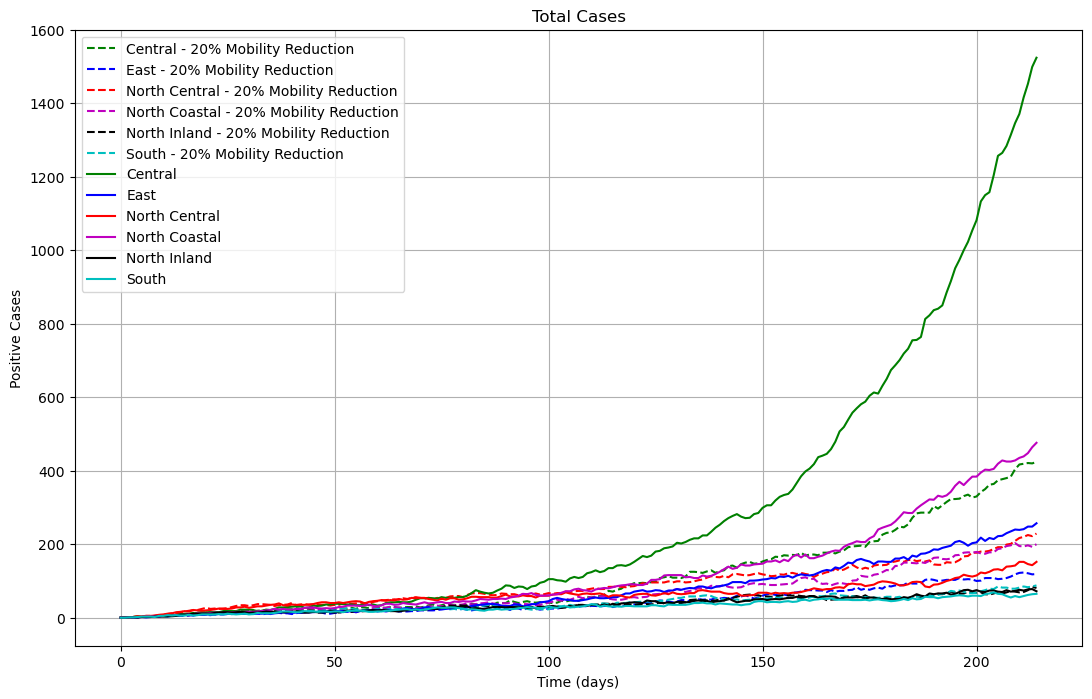

In [514]:
plot_total_result_mod('Central', 'East', 'North Central', 'North Coastal', 'North Inland', 'South', \
                  central_high_mod, east_high_mod, north_central_high_mod, north_coastal_high_mod, north_inland_high_mod, south_high_mod, \
                  central_low_mod, east_low_mod, north_central_low_mod, north_coastal_low_mod, north_inland_low_mod, south_low_mod, \
                  central_high_v1, east_high_v1, north_central_high_v1, north_coastal_high_v1, north_inland_high_v1, south_high_v1, \
                  central_low_v1, east_low_v1, north_central_low_v1, north_coastal_low_v1, north_inland_low_v1, south_low_v1, \
                  central_lsqs_min, east_lsqs_min, north_central_lsqs_min, north_coastal_lsqs_min, north_inland_lsqs_min, south_lsqs_min)

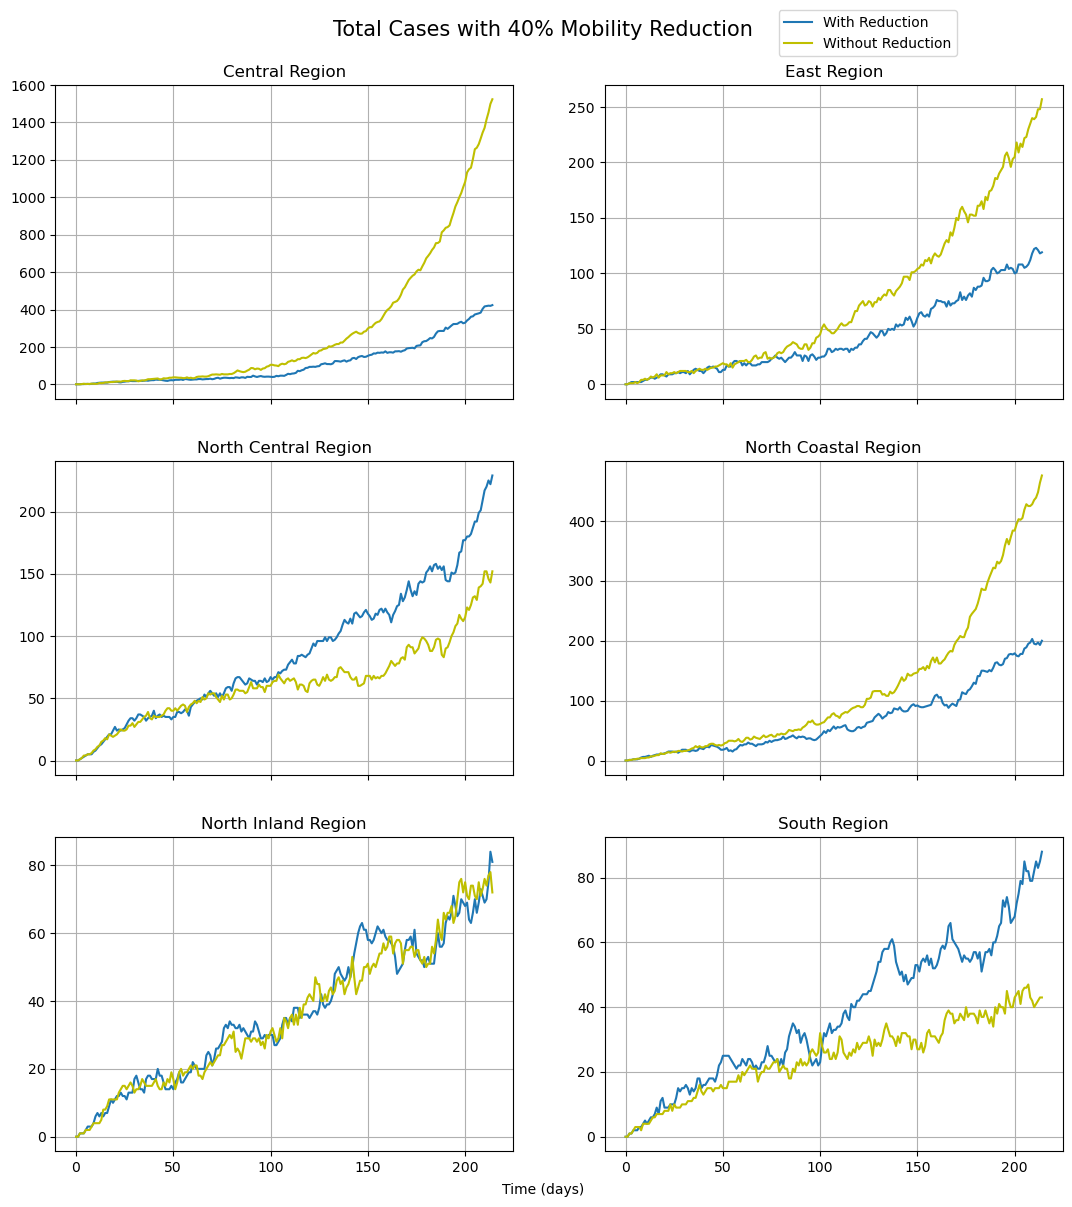

In [516]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 13), sharex=True)

ax1.plot(time, central_high_mod['I'][0] + central_low_mod['I'][0])
ax1.plot(time, central_high_v1['I'][central_lsqs_min.index[0]] + central_low_v1['I'][central_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax1.grid()
ax1.set_title('Central Region')

ax2.plot(time, east_high_mod['I'][0] + east_low_mod['I'][0])
ax2.plot(time, east_high_v1['I'][east_lsqs_min.index[0]] + east_low_v1['I'][east_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax2.grid()
ax2.set_title('East Region')

ax3.plot(time, north_central_high_mod['I'][0] + north_central_low_mod['I'][0])
ax3.plot(time, north_central_high_v1['I'][north_central_lsqs_min.index[0]] + north_central_low_v1['I'][north_central_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax3.grid()
ax3.set_title('North Central Region')

ax4.plot(time, north_coastal_high_mod['I'][0] + north_coastal_low_mod['I'][0])
ax4.plot(time, north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax4.grid()
ax4.set_title('North Coastal Region')

ax5.plot(time, north_inland_high_mod['I'][0] + north_inland_low_mod['I'][0])
ax5.plot(time, north_inland_high_v1['I'][north_inland_lsqs_min.index[0]] + north_inland_low_v1['I'][north_inland_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax5.grid()
ax5.set_title('North Inland Region')

ax6.plot(time, south_high_mod['I'][0] + south_low_mod['I'][0])
ax6.plot(time, south_high_v1['I'][south_lsqs_min.index[0]] + south_low_v1['I'][south_lsqs_min.index[0]], label='Total Cases', color = 'y')
ax6.grid()
ax6.set_title('South Region')

fig.subplots_adjust(hspace=0.2, top=0.93)

fig.suptitle("Total Cases with 40% Mobility Reduction", fontsize=15)
fig.text(0.5, 0.08, 'Time (days)', ha='center', va='center')
labels = ['With Reduction', 'Without Reduction']
fig.legend(labels=labels, loc='center', bbox_to_anchor=(0.75, 0.97), borderaxespad=0)
plt.show()

In [517]:
total_sd = np.sum(central_high_v1['I'][central_lsqs_min.index[0]] + central_low_v1['I'][central_lsqs_min.index[0]]) + \
np.sum(east_high_v1['I'][east_lsqs_min.index[0]] + east_low_v1['I'][east_lsqs_min.index[0]]) + \
np.sum(north_central_high_v1['I'][north_central_lsqs_min.index[0]] + north_central_low_v1['I'][north_central_lsqs_min.index[0]]) + \
np.sum(north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]]) + \
np.sum(north_inland_high_v1['I'][north_inland_lsqs_min.index[0]] + north_inland_low_v1['I'][north_inland_lsqs_min.index[0]]) + \
np.sum(south_high_v1['I'][south_lsqs_min.index[0]] + south_low_v1['I'][south_lsqs_min.index[0]])

In [528]:
def diff(new,old):

    return 100*(new-old)/old

In [531]:
diff(np.sum(north_coastal_high_mod['I'][0] + north_coastal_low_mod['I'][0]),np.sum(north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]]))

-44.67801007172287

In [518]:
total_sd_show = central_high_v1['I'][central_lsqs_min.index[0]] + central_low_v1['I'][central_lsqs_min.index[0]] + \
east_high_v1['I'][east_lsqs_min.index[0]] + east_low_v1['I'][east_lsqs_min.index[0]] + \
north_central_high_v1['I'][north_central_lsqs_min.index[0]] + north_central_low_v1['I'][north_central_lsqs_min.index[0]] + \
north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]] + north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]] + \
north_inland_high_v1['I'][north_inland_lsqs_min.index[0]] + north_inland_low_v1['I'][north_inland_lsqs_min.index[0]] + \
south_high_v1['I'][south_lsqs_min.index[0]] + south_low_v1['I'][south_lsqs_min.index[0]]

In [519]:
total_sd_mod = np.sum(central_high_mod['I'][0] + central_low_mod['I'][0]) + \
np.sum(east_high_mod['I'][0] + east_low_mod['I'][0]) + \
np.sum(north_central_high_mod['I'][0] + north_central_low_mod['I'][0]) + \
np.sum(north_coastal_high_mod['I'][0] + north_coastal_low_mod['I'][0]) + \
np.sum(north_inland_high_mod['I'][0] + north_inland_low_mod['I'][0]) + \
np.sum(south_high_mod['I'][0] + south_low_mod['I'][0])

In [520]:
total_sd_mod_show = central_high_mod['I'][0] + central_low_mod['I'][0] + \
east_high_mod['I'][0] + east_low_mod['I'][0] + \
north_central_high_mod['I'][0] + north_central_low_mod['I'][0] + \
north_coastal_high_mod['I'][0] + north_coastal_low_mod['I'][0] + \
north_inland_high_mod['I'][0] + north_inland_low_mod['I'][0] + \
south_high_mod['I'][0] + south_low_mod['I'][0]

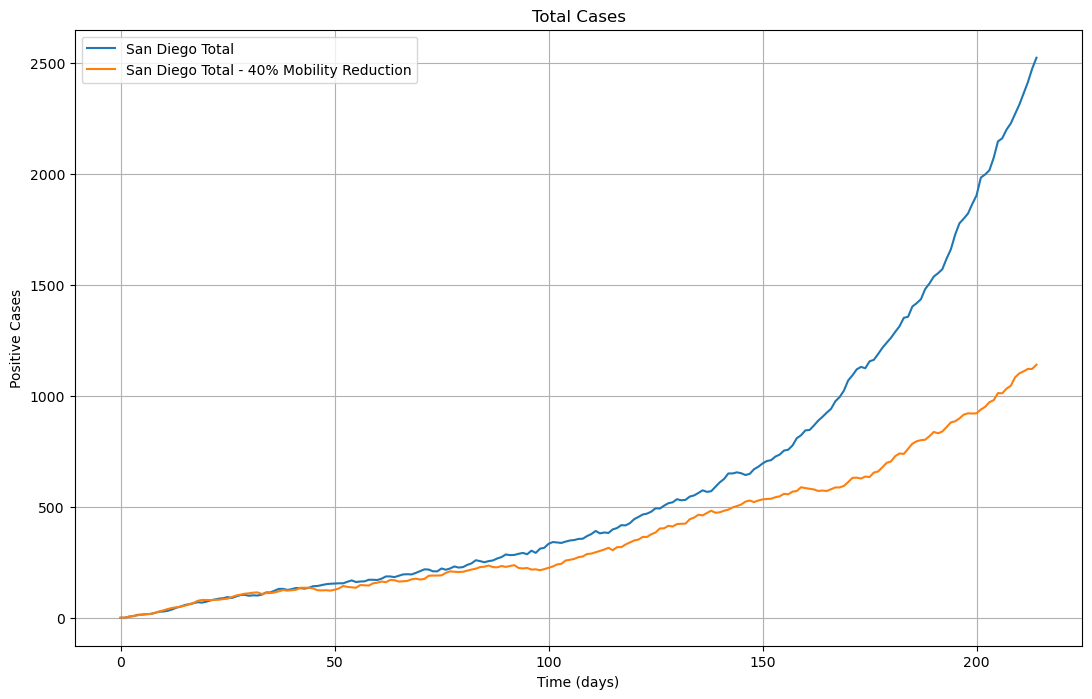

In [521]:
plt.figure(figsize=(13, 8))
plt.plot(time, total_sd_show, label='San Diego Total')
plt.plot(time, total_sd_mod_show, label='San Diego Total - 40% Mobility Reduction')
plt.title('Total Cases')
plt.legend(loc='upper left')
plt.xlabel('Time (days)')
plt.ylabel('Positive Cases')
plt.grid()
plt.show()

In [522]:
print(total_sd)
print(total_sd_mod)

131715.0
82531.0


In [524]:
100*(total_sd_mod - total_sd) /total_sd

-37.34122916903922